In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

# Quantities: 
This type of graph shows the levels of variables. Also, these graphs show the variables according to categories or classifications.

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns # construida encima de matoplotlib, para gráficos cruzados
import datetime as dt

Datasets transformed into Latin characters. The following commands should be used in STATA:

cd "....\documents"

unicode analyze enaho.dta

unicode encoding set "latin1" 

unicode translate enaho.dta


**The following database includes enaho modules (200, 300 and 500) for the period 2011 - 2019**

In [3]:
enaho = pd.read_stata(r"../_data/enaho.dta")
enaho

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2011,0061,077,11,010701,04,selva,"de 4,001 a 10,000 viviendas",2.011006e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,2.0,4.0,NaN,361.0,familiar,010000
1,2011,0110,112,11,010705,05,selva,Área de empadronamiento rural - aer compuesto,2.011011e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,9.0,400.0,familiar,010000
2,2011,0090,076,11,010205,03,selva,Área de empadronamiento rural - aer compuesto,2.011009e+14,nieto,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,36.0,484.0,familiar,010000
3,2011,0118,080,11,010401,03,selva,Área de empadronamiento rural - aer simple,2.011012e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,010000
4,2011,3408,066,11,010402,03,selva,Área de empadronamiento rural - aer compuesto,2.011341e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,0.0,400.0,familiar,010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160767,2019,009703,084,11,250302,05,selva,"401 a 4,000 viviendas",2.019010e+16,yerno/nuera,...,11.0,4.0,15.0,Universitaria incompleta,0.0,0.0,NaN,441.0,familiar,250000
160768,2019,009675,124,11,250107,03,selva,"de 20,001 a 100,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,0.0,484.0,familiar,250000
160769,2019,009703,084,11,250302,04,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,9.0,81.0,0.0,676.0,familiar,250000
160770,2019,009700,143,11,250301,03,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,NaN,400.0,familiar,250000


## Number of companies classification by number of workers hired
Microbusinesses < 10 workers ;
Small businesses (10-20 workers);
Medium businesses (21-100 workers);
Big Businesses (>100 workers)

In [4]:
enaho['empresa']

0                     NaN
1            microempresa
2            microempresa
3                     NaN
4            gran empresa
               ...       
160767                NaN
160768       microempresa
160769    mediana empresa
160770                NaN
160771       microempresa
Name: empresa, Length: 160772, dtype: category
Categories (4, object): ['microempresa' < 'pequeña empresa' < 'mediana empresa' < 'gran empresa']

In [5]:
enaho['empresa'].value_counts()

empresa
microempresa       58002
gran empresa       29642
mediana empresa    10304
pequeña empresa     9306
Name: count, dtype: int64

Why do many examples use `fig, ax = plt.subplots()` in Matplotlib/pyplot/python ? 

https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'))

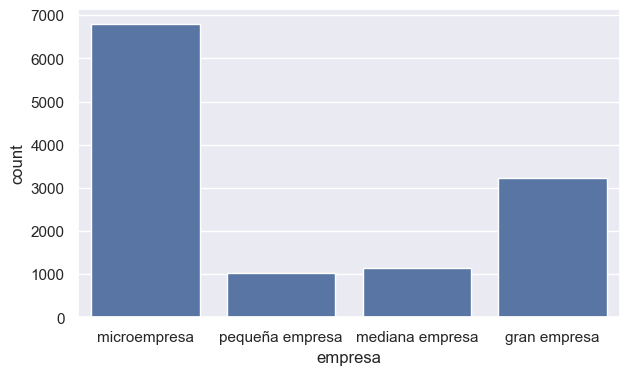

In [18]:
# Estilo del gráfico:
sns.set( style = "darkgrid" ) 
# sns.set( style = "whitegrid" )

fig, ax = plt.subplots( figsize=(7,4) )

x = sns.countplot( x="empresa", data=enaho[enaho['year'] == "2019" ])
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Add as many colors as needed
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette= colors)
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette="viridis" , legend = False)
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette="magma" , legend = True)
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette="rocket_r" , legend = False)

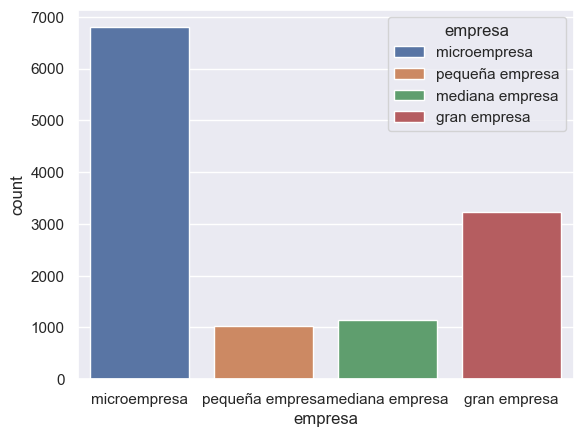

In [19]:
x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ])
# en cada barra, separa los colores de cada empresa asignándole un color distinto

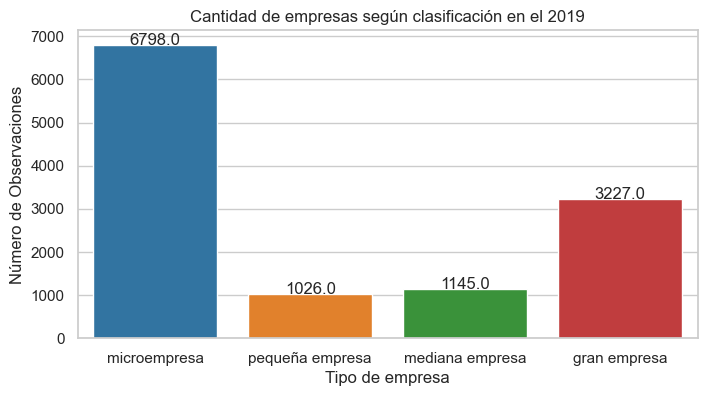

In [46]:
# Estilo del gráfico:
# sns.set( style = "darkgrid" ) 
sns.set( style = "whitegrid" )

fig, ax = plt.subplots( figsize=(8, 4) )

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Add as many colors as needed
x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette= colors, legend = False)
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette="viridis" , legend = False)
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette="magma" , legend = False)
# x = sns.countplot( x="empresa", hue = "empresa", data=enaho[enaho['year'] == "2019" ], palette="rocket_r" , legend = False)

# Iterar sobre las barras
for p in ax.patches:
    # Obtener la posición y la altura de la barra
    height = p.get_height()
    # Colocar el texto sobre la barra
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{}'.format(height), ha='center', va='baseline')
    # ha : 'left', 'center', 'right'
    # va : 'baseline', 'bottom', 'center', 'center_baseline', 'top'
    
plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Tipo de empresa')
plt.ylabel('Número de Observaciones')
plt.show()

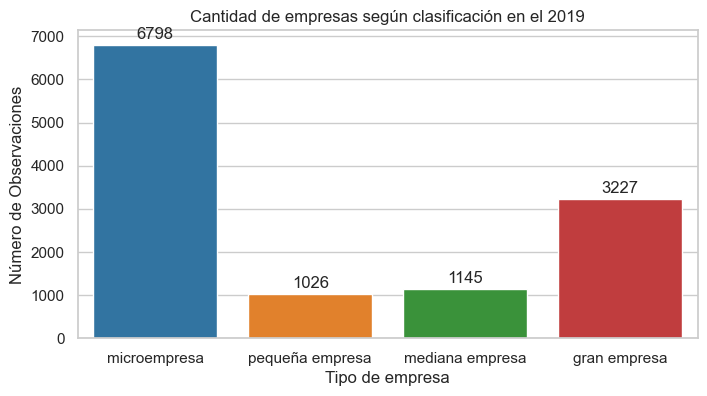

In [52]:
# Estilo del gráfico
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 4))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Añadir tantos colores como sea necesario
x = sns.countplot(x="empresa", hue="empresa", data=enaho[enaho['year'] == "2019"], palette=colors, legend=False)

# Iterar sobre los contenedores de las barras
for container in ax.containers:
    # Añadir etiquetas a cada barra
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Tipo de empresa')
plt.ylabel('Número de Observaciones')
plt.show()

###### Vertical Countplot and one color (red)

Text(0, 0.5, 'Tipo de empresa')

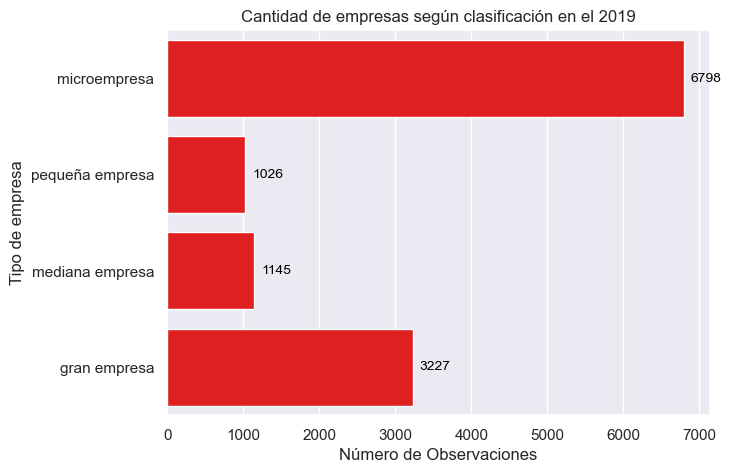

In [67]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7,5))

x = sns.countplot(y = "empresa", data=enaho[enaho['year'] == "2019" ], color = 'red')

for container in ax.containers:
    # Ajustar la posición de las etiquetas a la derecha
    for p in container:
        ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # Mover 10 píxeles a la derecha
                textcoords="offset points", 
                ha='left', va='center', fontsize=10, color='black')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Número de Observaciones')
plt.ylabel('Tipo de empresa')

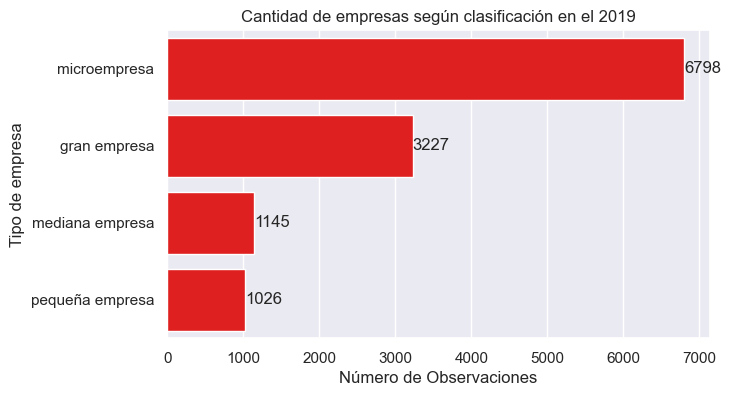

In [53]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7, 4))

# Ordenar las categorías de 'empresa' por la cantidad de observaciones
ordered_data = enaho[enaho['year'] == "2019"]['empresa'].value_counts().index

# Crear el gráfico con las barras ordenadas de mayor a menor
x = sns.countplot(y="empresa", data=enaho[enaho['year'] == "2019"], order=ordered_data, color='red')

for container in ax.containers:
    ax.bar_label(container)
   
plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel('Número de Observaciones')
plt.ylabel('Tipo de empresa')

plt.show()

## Evolutions of business in period 2017-2019
Gráfico de barras, cruzado (**sns.countplot**)

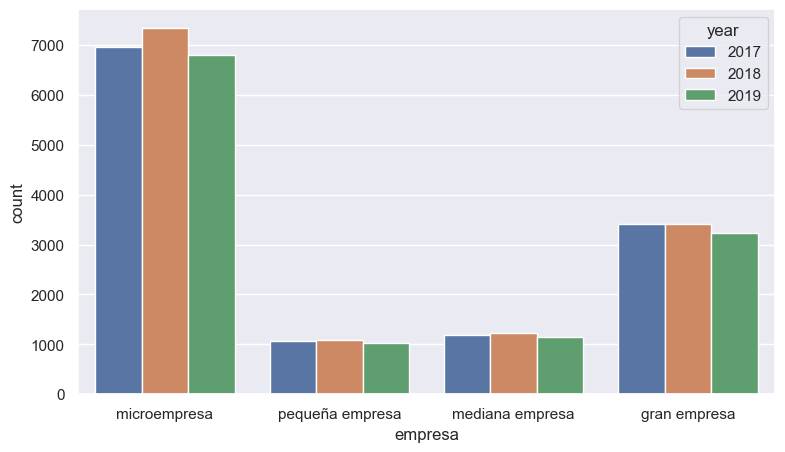

In [72]:
base2 = enaho[enaho['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(9,5))

ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=base2) # hue: variable de cruce

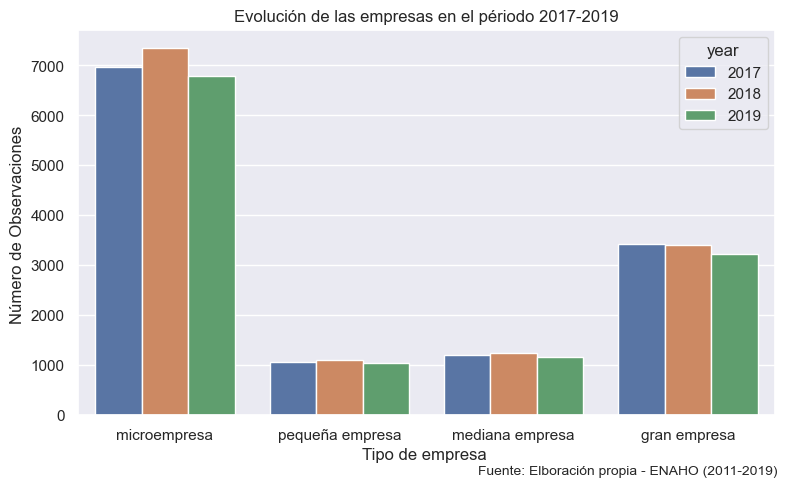

In [84]:
base2 = enaho[enaho['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(9,5))

# hue: variable descomposition

ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=base2)

plt.title('Evolución de las empresas en el périodo 2017-2019')
plt.xlabel('Tipo de empresa ')
plt.ylabel('Número de Observaciones ')
txt="Fuente: Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.57,0.01, txt, wrap=True, horizontalalignment='left', va="top", fontsize=10)
plt.show()
# Cuando son muchas barras, no es recomendable que se muestren los labels de los valores

## Number of companies by strata (urbano o rural) and evolution by years
Gráfico de barras cruzado por dos variables (**sns.catplot**)

hue = split in groups but in the same graph <br>
col = create two new groups base in id group

In [85]:
base2.area

103666    Urbana
103667     Rural
103668    Urbana
103669    Urbana
103670    Urbana
           ...  
160767    Urbana
160768    Urbana
160769    Urbana
160770    Urbana
160771    Urbana
Name: area, Length: 57106, dtype: category
Categories (2, object): ['Rural' < 'Urbana']

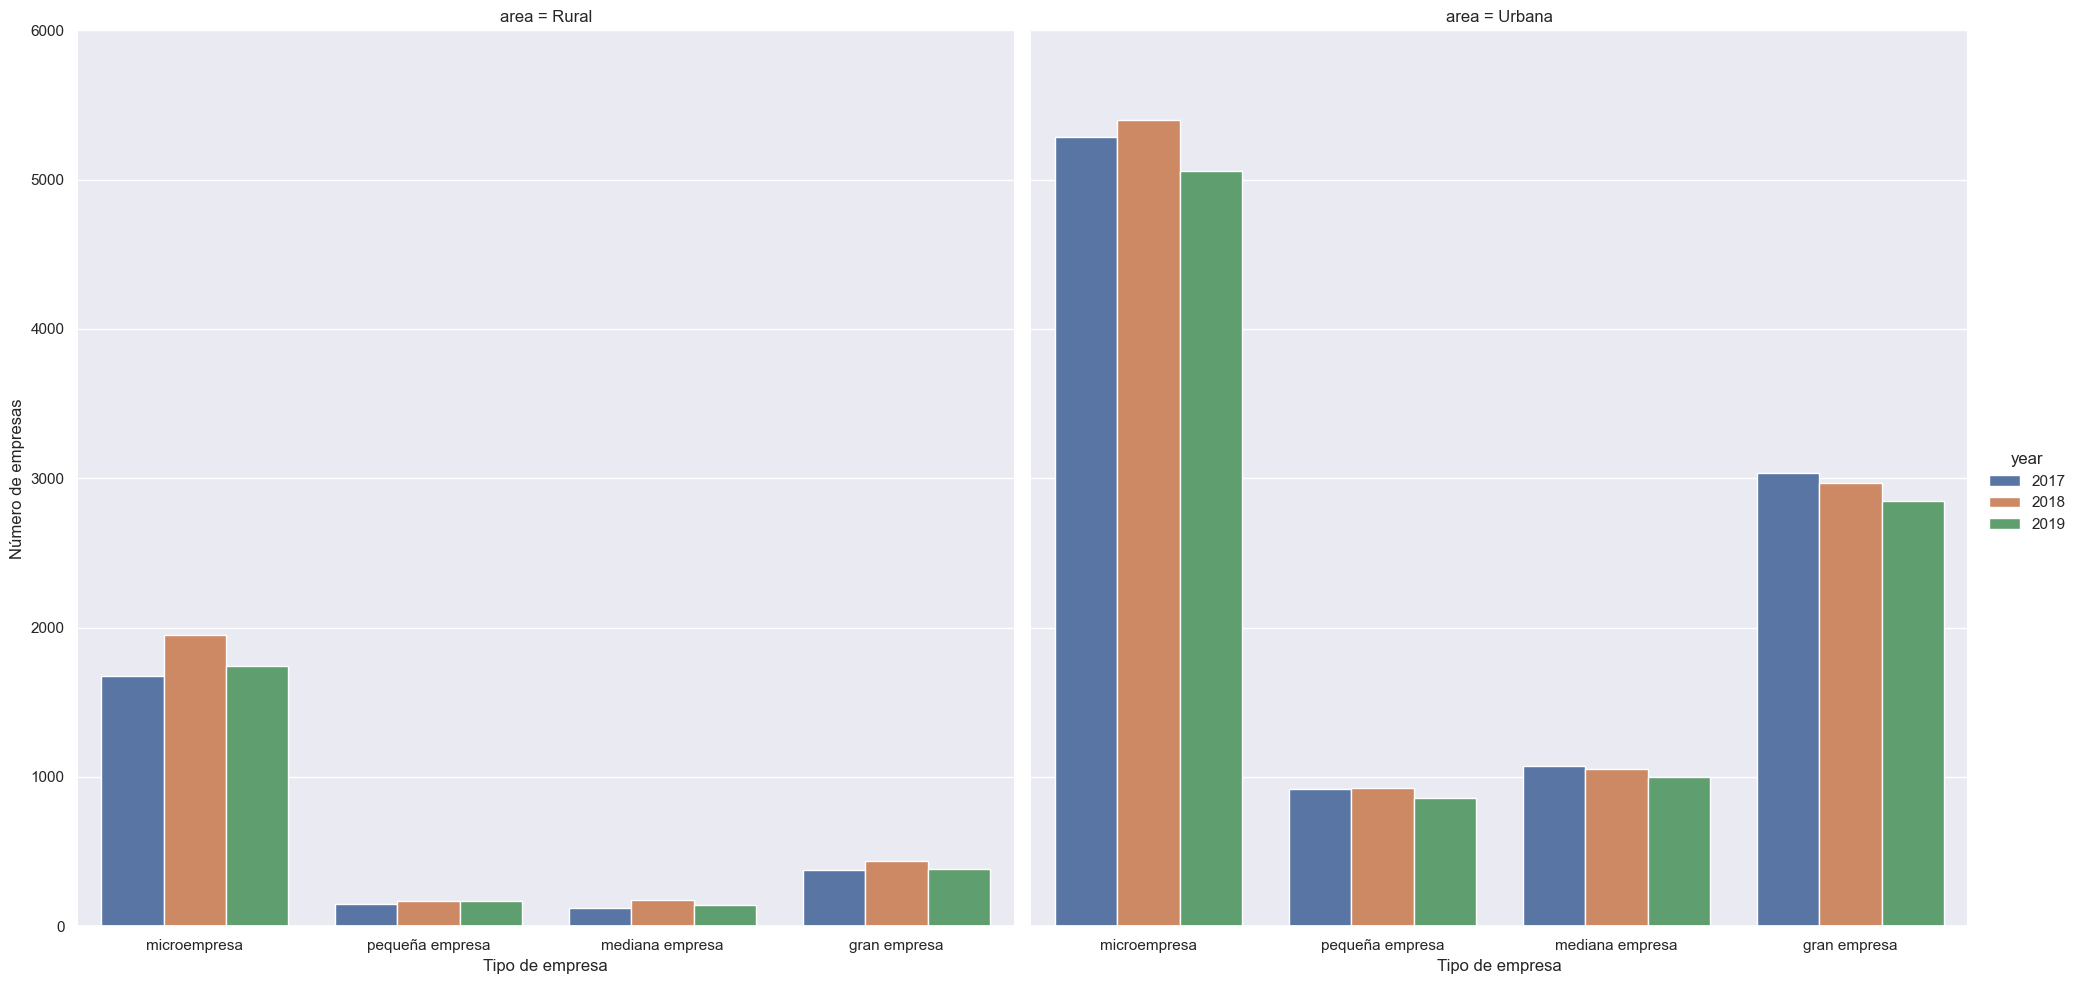

In [105]:
ag = sns.catplot(x="empresa", hue="year", col= "area" , data = base2, kind = "count", height = 10, aspect = 1);
# aspect: mientras más grande, más chata la gráfica
# con height no solo crece altura, sino también ancho
(ag.set_axis_labels("Tipo de empresa", "Número de empresas")
  .set(ylim=(0, 6000))
  .despine(left=True)) 

## Number of businesses by strata - stacked bar plot

In [110]:
# count businesses by strata using groubpy (similar collapse - stata)
#base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ], as_index = False )[['conglome'] ].count()
base_2 = enaho[ enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ], observed = True ).size().reset_index(name='num_firms')
base_2
# observed = True solo mostrará las combinaciones combinaciones de valores que realmente ocurren en los datos, 
# mientras que observed=False (el valor actual por defecto) incluirá todas las combinaciones posibles de categorías,
# incluso si no están presentes en los datos.

,empresa,area,num_firms
0,microempresa,Rural,1742
1,microempresa,Urbana,5056
2,pequeña empresa,Rural,169
3,pequeña empresa,Urbana,857
4,mediana empresa,Rural,145
5,mediana empresa,Urbana,1000
6,gran empresa,Rural,381
7,gran empresa,Urbana,2846


In [111]:
# stacked information
base_3 = base_2.pivot(index = 'empresa', columns = 'area', values = 'num_firms')
base_3

area,Rural,Urbana
empresa,,
microempresa,1742,5056
pequeña empresa,169,857
mediana empresa,145,1000
gran empresa,381,2846


Text(0.5, 0, ' ')

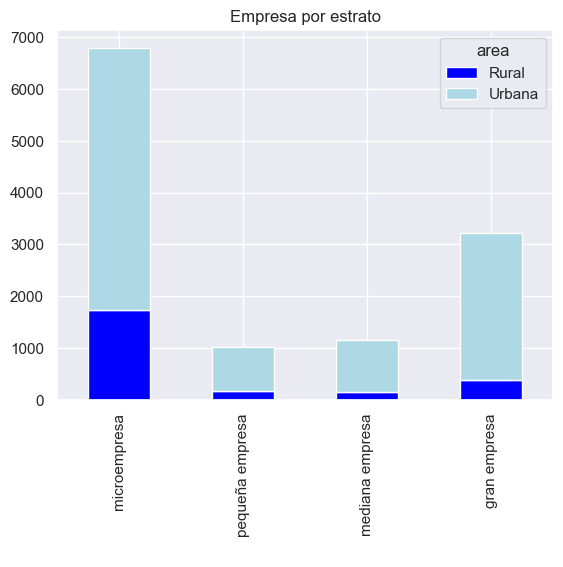

In [121]:
base_3.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

In [73]:
base_3.columns

CategoricalIndex(['Rural', 'Urbana'], categories=['Rural', 'Urbana'], ordered=True, dtype='category', name='area')

In [123]:
base_3_2 = base_3.copy()

In [124]:
base_3_2 = base_3_2[["Urbana", "Rural"]] # cambiamos el orden de las columnas
base_3_2

area,Urbana,Rural
empresa,,
microempresa,5056,1742
pequeña empresa,857,169
mediana empresa,1000,145
gran empresa,2846,381


Text(0.5, 0, ' ')

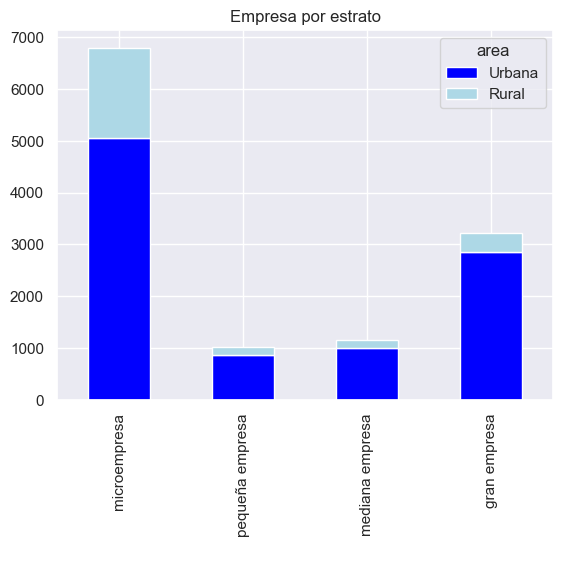

In [125]:
base_3_2.plot( kind='bar', stacked=True, title='Empresa por estrato', color = ['blue', 'lightblue'] )
plt.xlabel(' ')

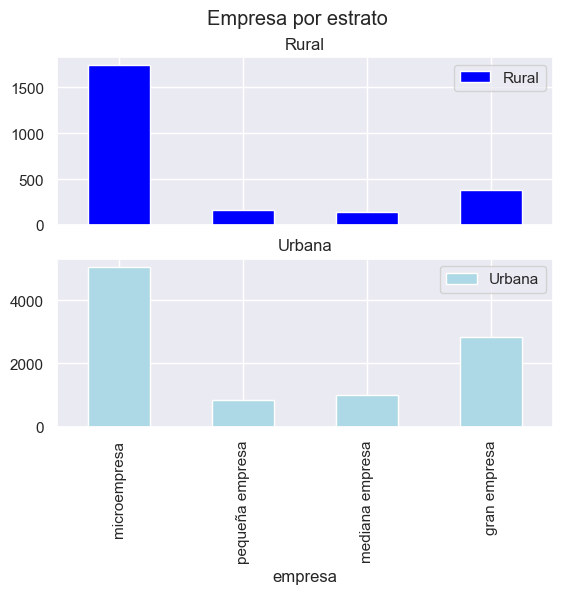

In [132]:
# cambiamos stacked = True por subplots=True
axes = base_3.plot( kind='bar', subplots=True,  title='Empresa por estrato', color = ['blue', 'lightblue'])
plt.xticks(rotation=90)
plt.show()

# Proportions

Understandable plots to show categorical variables. Use this plots to explain participations from categories. 

## Pie 

##### First at all, collapse dataframe to count categories of a variable 

In [137]:
base = enaho.groupby([ 'empresa'], observed = True ).count()
base

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
empresa,,,,,,,,,,,,,,,,,,,,,
microempresa,58002,58002,58002,58002,58002,58002,58002,58002,58002,58002,...,57991,58002,57991,57991,57565,57565,58001,58002,58002,58002
pequeña empresa,9306,9306,9306,9306,9306,9306,9306,9306,9306,9306,...,9301,9306,9301,9301,9202,9202,9303,9306,9306,9306
mediana empresa,10304,10304,10304,10304,10304,10304,10304,10304,10304,10304,...,10302,10304,10302,10302,10212,10212,10304,10304,10304,10304
gran empresa,29642,29642,29642,29642,29642,29642,29642,29642,29642,29642,...,29639,29642,29639,29639,29392,29392,29640,29642,29642,29642


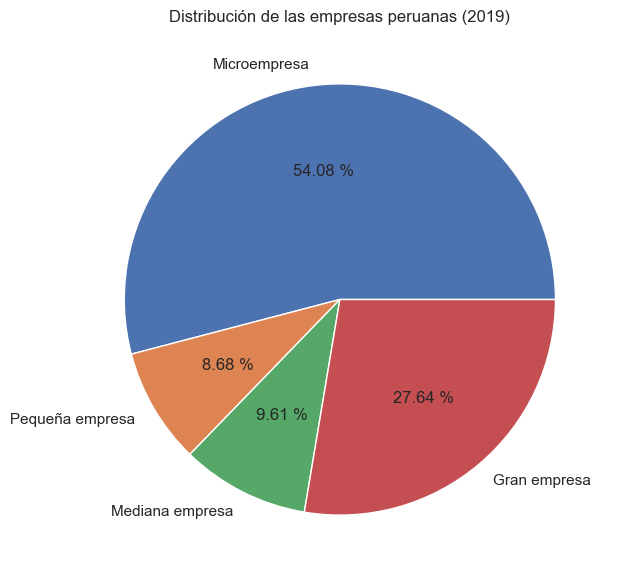

In [142]:
# Labels to correct categories names 

labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']

plt.figure(figsize=(7,7)) # cuadrado

ax = plt.pie(base['conglome'], labels=labels, autopct='%.2f %%') # %.2f %% significa que el formato tiene 2 decimales
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()

In [154]:
enaho.labor.value_counts()

labor
Ocupaciones elementales                                   25556
Trabajadores de ventas y en servicios                     18691
Asistentes administrativos                                14423
Técnicos y similares                                      12414
Operadores de planta y maquinaria                         11794
Administradores                                           11310
Trabajo en artesanía y afines                              8648
Trabajo en actividades agrícolas, selvicultura y pesca     5224
Profesionales y fuerzas armadas                            1958
Name: count, dtype: int64

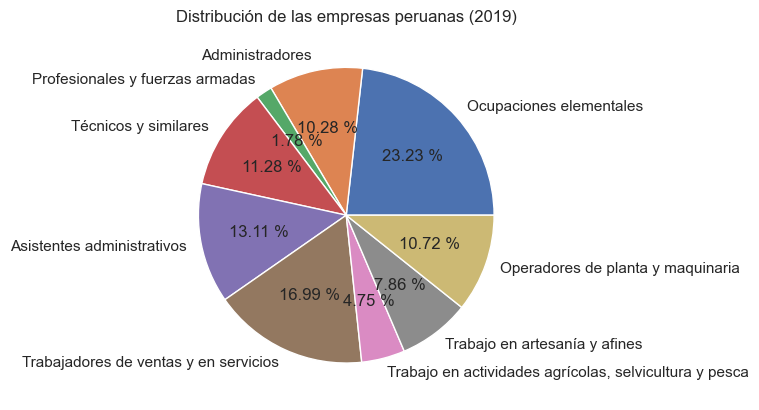

In [153]:
base = enaho.groupby([ 'labor'], observed = True ).count()
labores = ['Ocupaciones elementales', 'Administradores', 'Profesionales y fuerzas armadas', 'Técnicos y similares', 'Asistentes administrativos',
'Trabajadores de ventas y en servicios', 'Trabajo en actividades agrícolas, selvicultura y pesca', 'Trabajo en artesanía y afines', 
'Operadores de planta y maquinaria']
ax = plt.pie(base['conglome'], labels=labores, autopct='%.2f %%') # %.2f %% significa que el formato tiene 2 decimales
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()

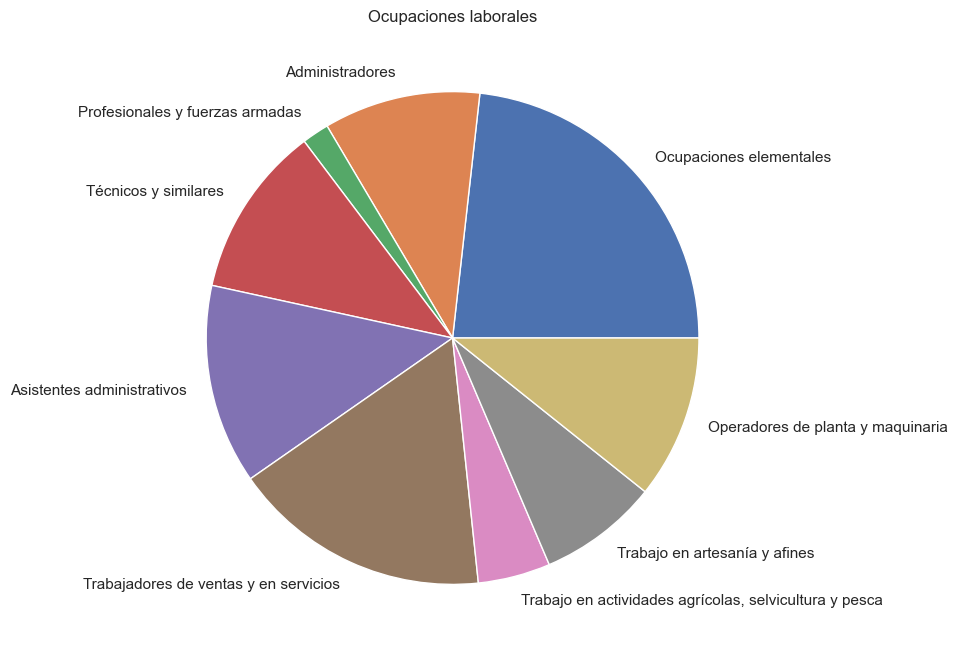

In [151]:
base = enaho.groupby('labor', observed = True).size()
base.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

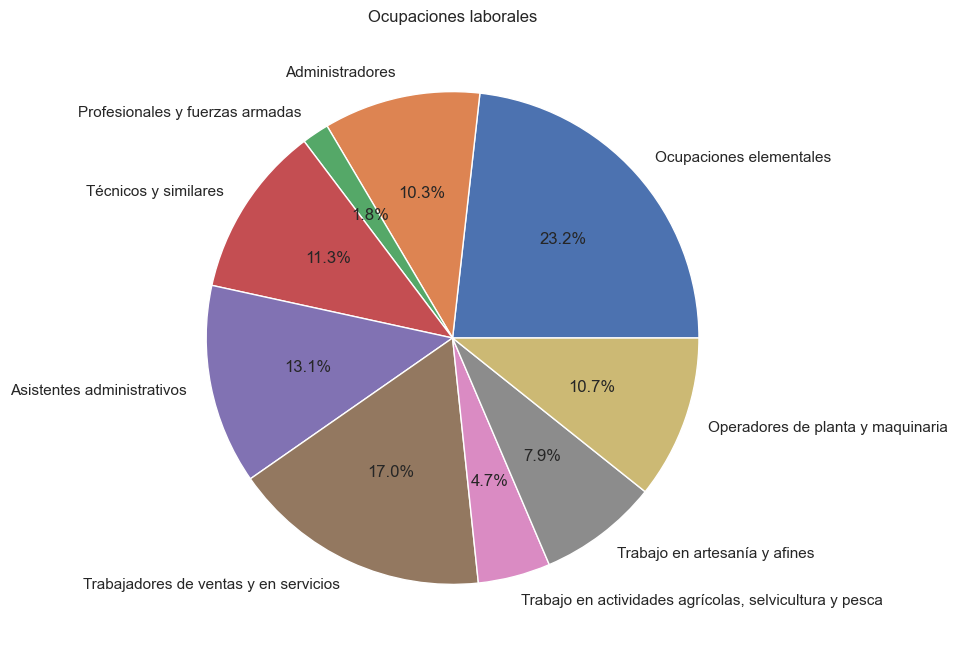

In [160]:
base = enaho.groupby('labor', observed = True).size()
base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct = "%1.1f%%")
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

## Donuts

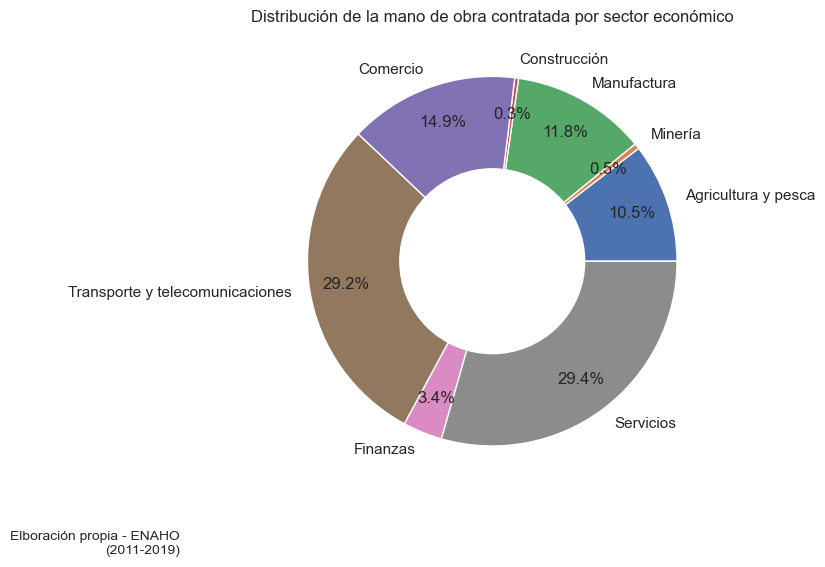

In [171]:
base2 = enaho.groupby([ 'sector' ], observed = True).count()
labels=['Agricultura y pesca','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']
plt.figure(figsize=(10, 6))
ax = plt.pie(base2['conglome'], labels=labels, autopct='%1.1f%%', pctdistance=0.8) # pctdistance: ¿cuán lejos del centro está?
  
# centroid size and color (hasta la línea anterior era un pie, le agregaremo un círculo blanco)
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
plt.title('Distribución de la mano de obra contratada por sector económico')
txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)
plt.show()

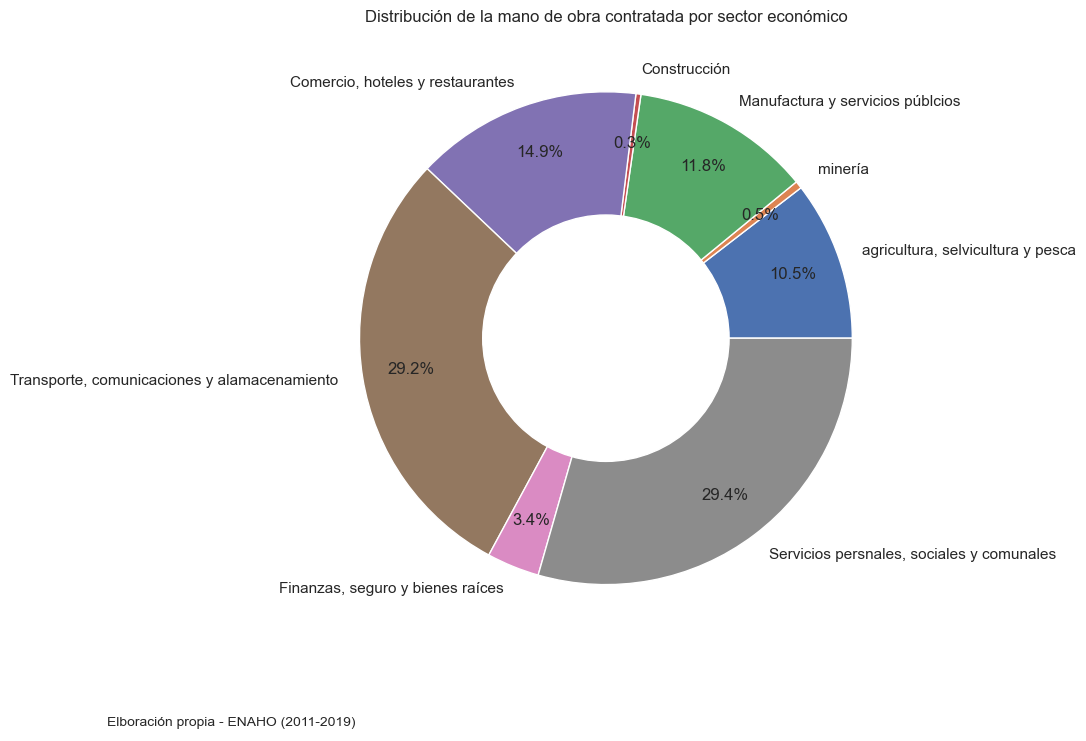

In [183]:
base = enaho.groupby('sector', observed = True).size()
base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct = "%1.1f%%", pctdistance = 0.8)
plt.title("Sector")
plt.ylabel("")

# centroid size and color (hasta la línea anterior era un pie, le agregaremo un círculo blanco)
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
plt.title('Distribución de la mano de obra contratada por sector económico')
txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)
plt.show()

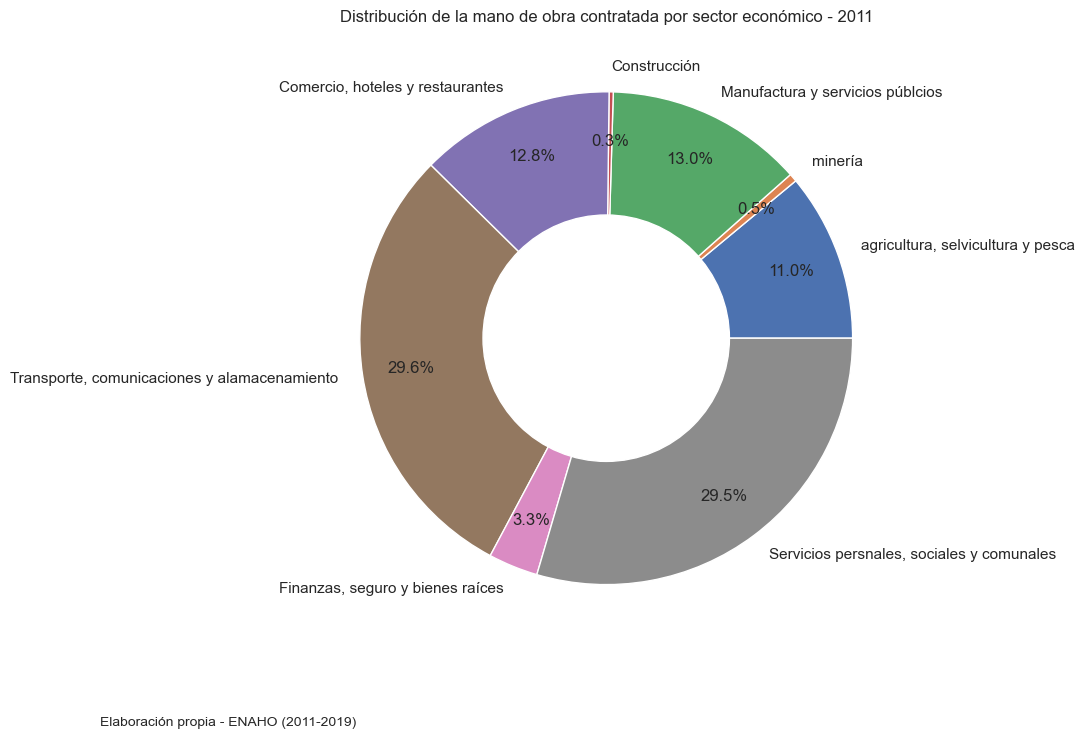

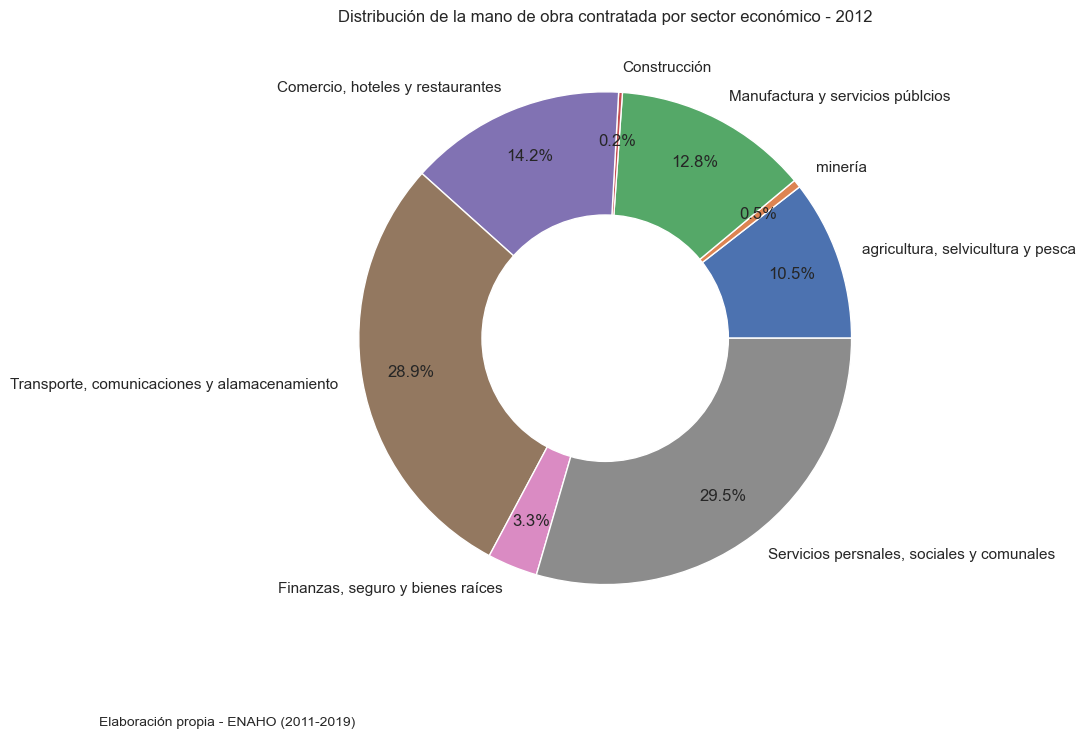

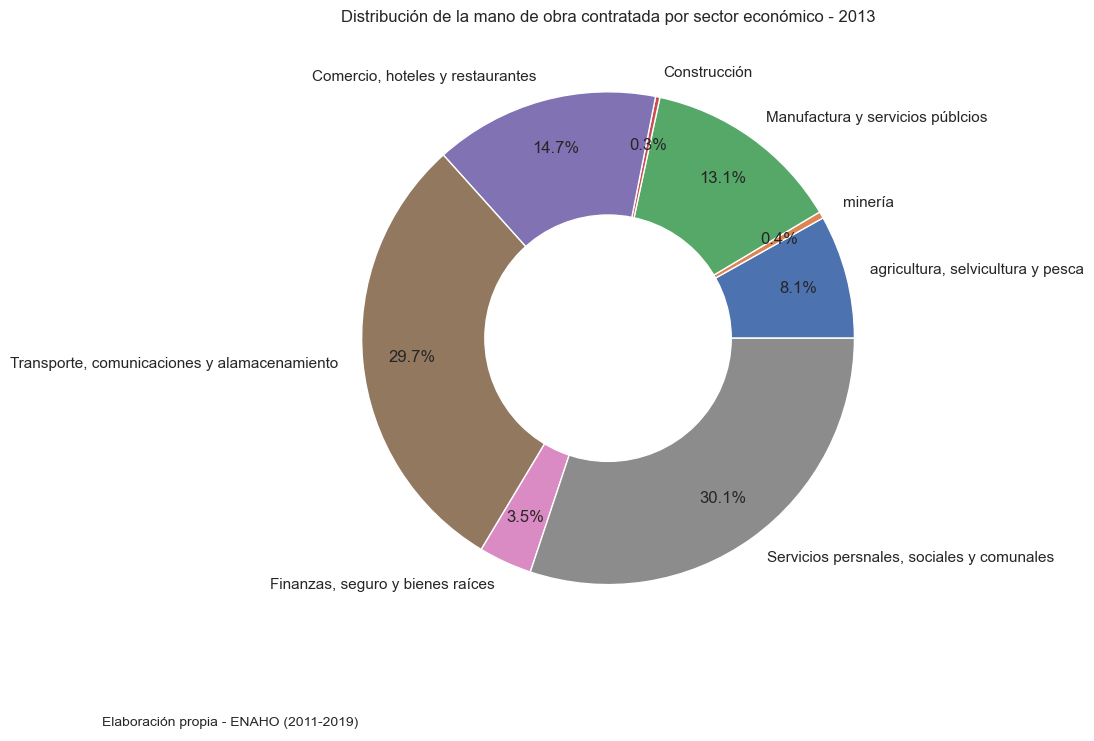

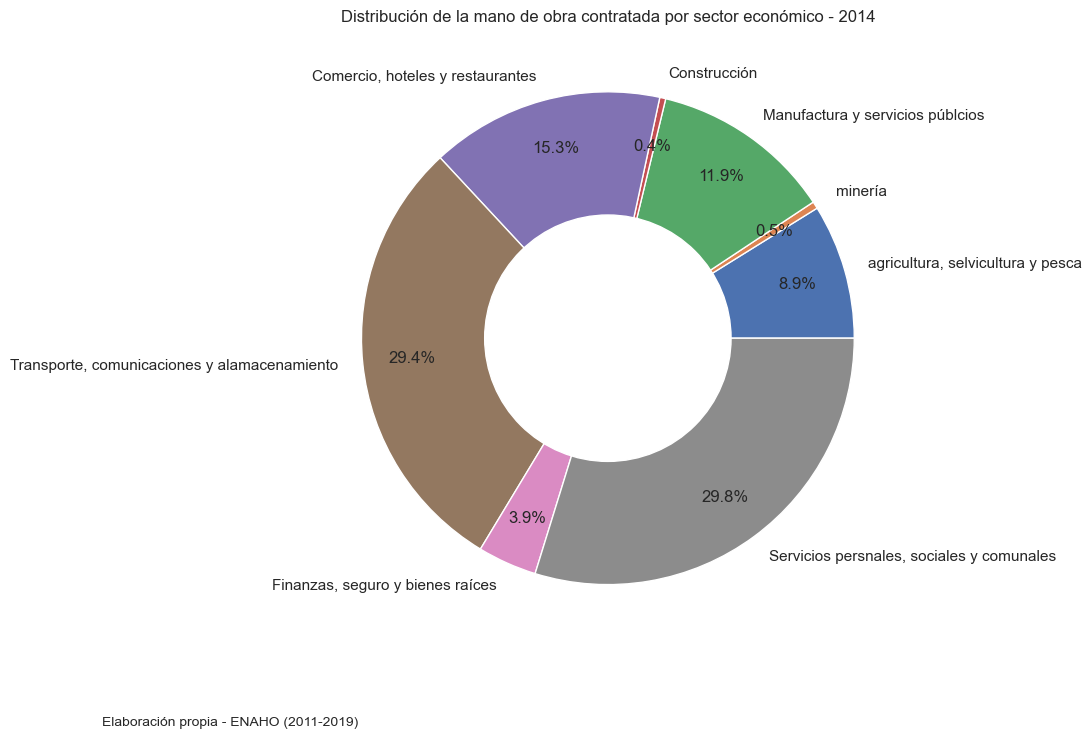

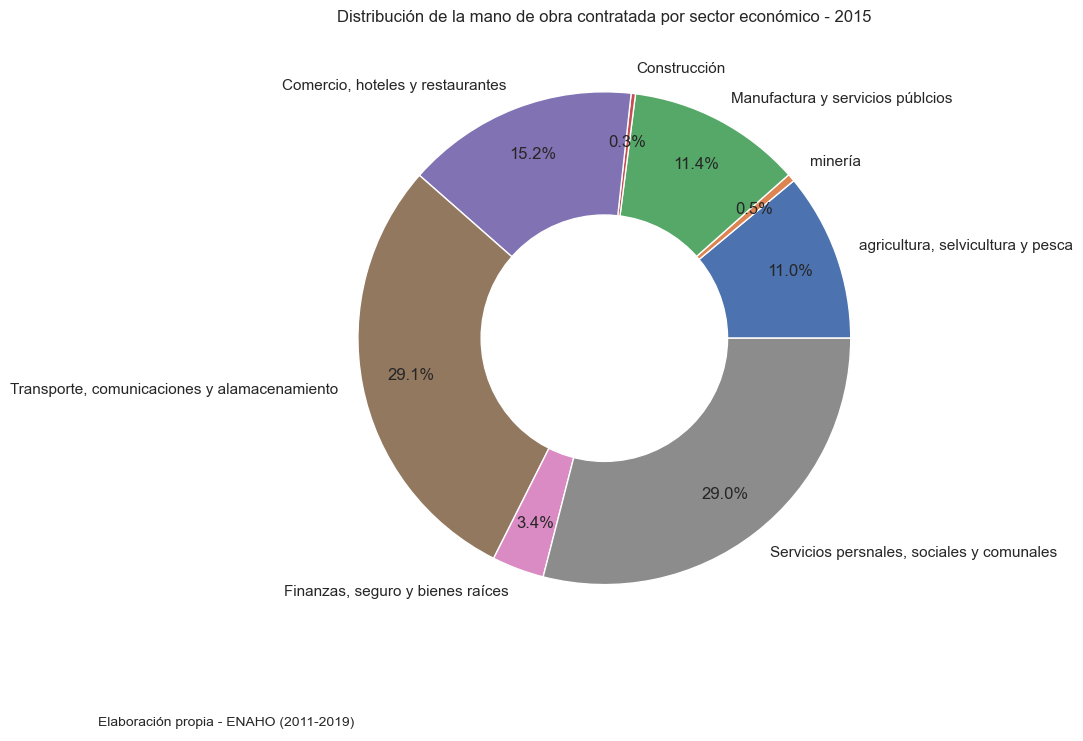

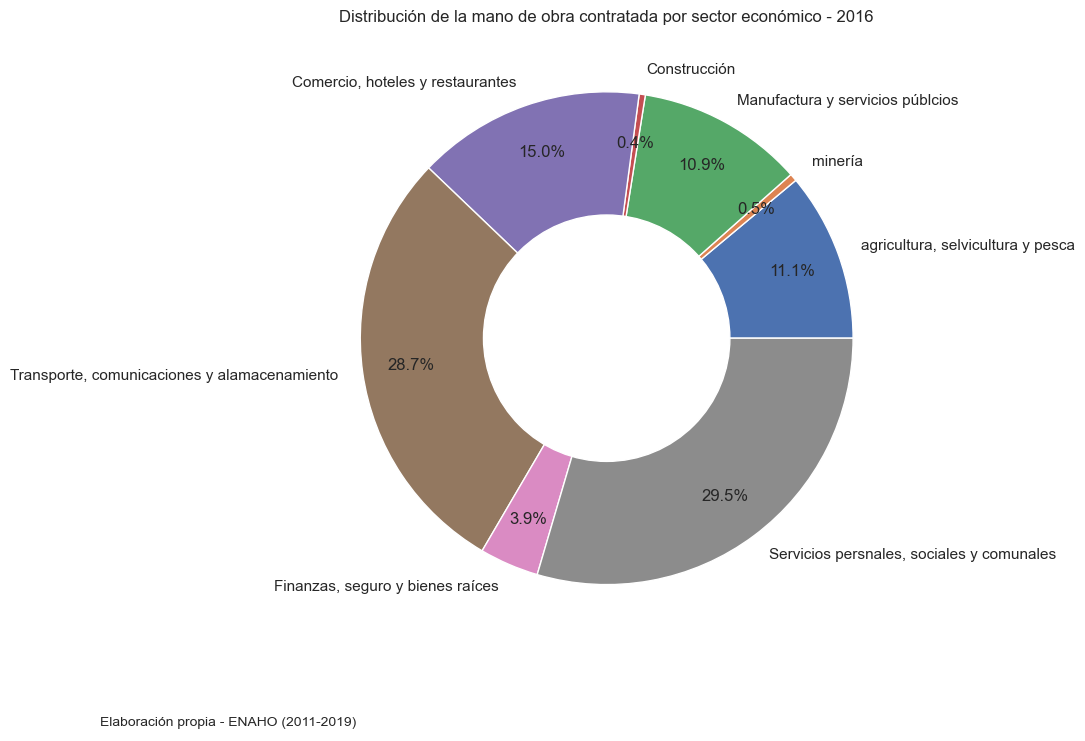

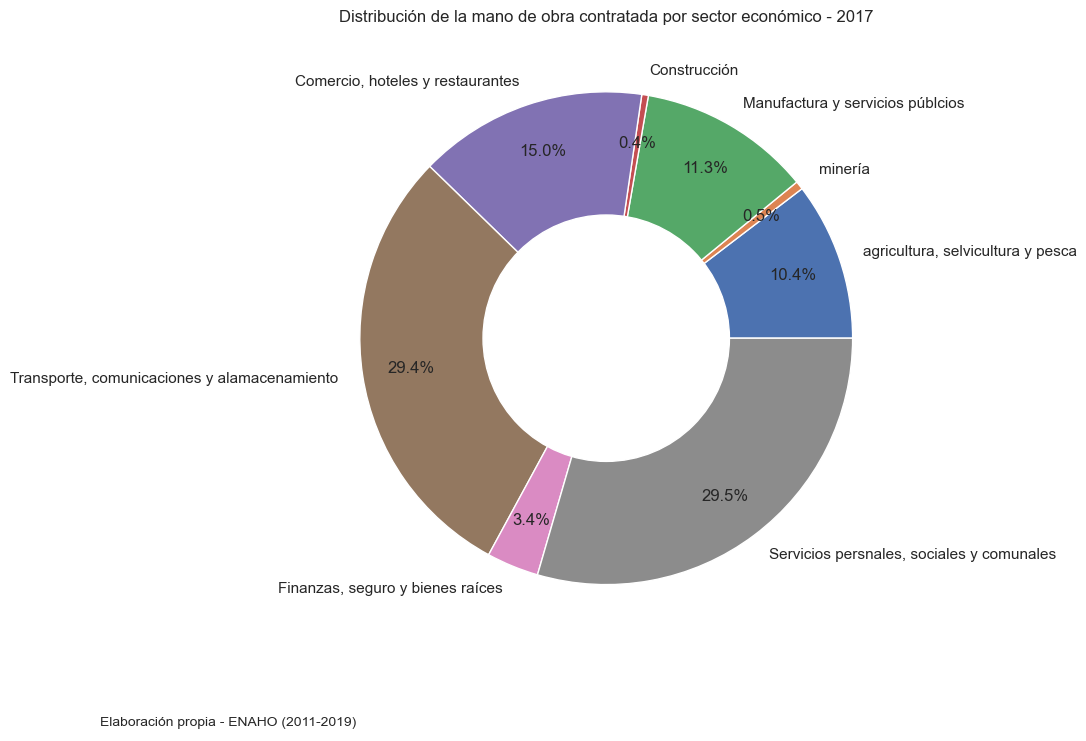

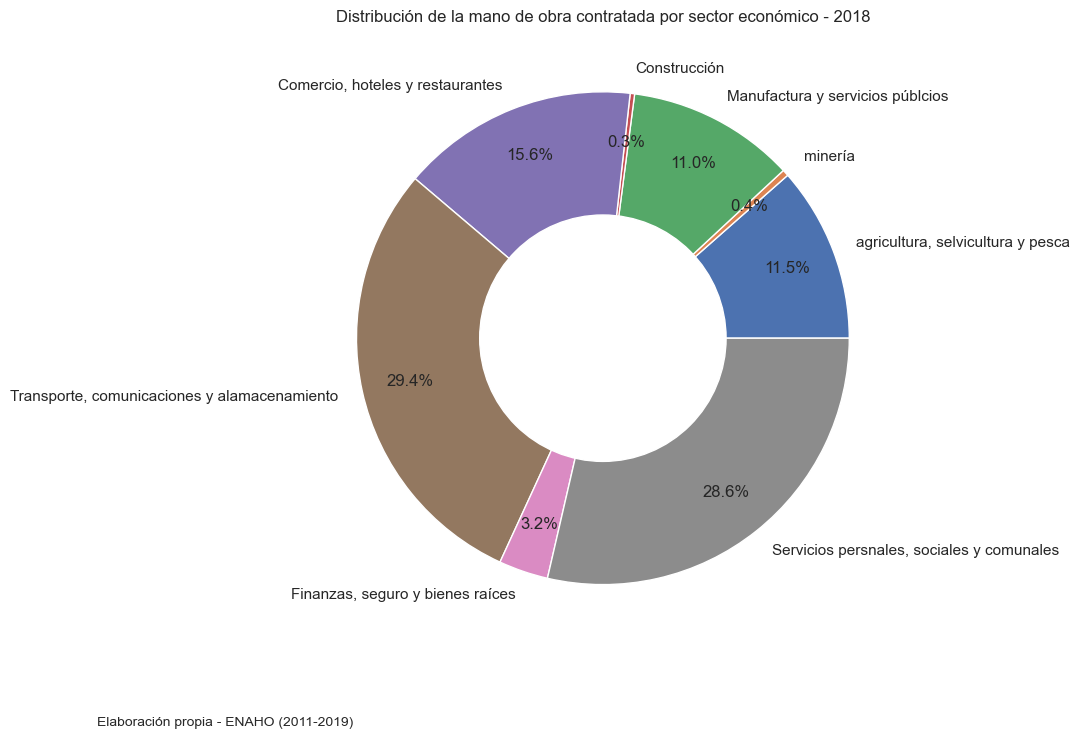

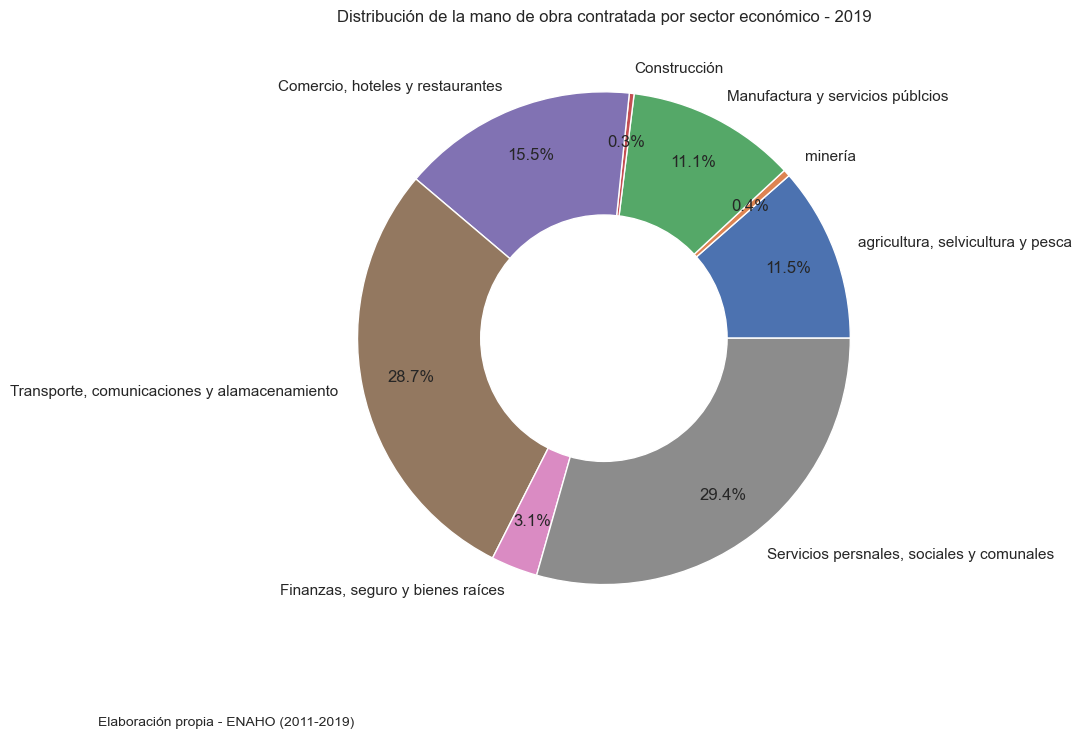

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tu DataFrame se llama enaho y tiene una columna 'year'
years = enaho['year'].unique()

for year in years:
    # Filtrar datos para el año actual
    data = enaho[enaho['year'] == year]
    
    # Crear el gráfico de pastel
    base = data.groupby('sector', observed=True).size()
    ax = base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct="%1.1f%%", pctdistance=0.8)
    plt.title(f"Distribución de la mano de obra contratada por sector económico - {year}")
    plt.ylabel("")

    # Agregar el círculo blanco en el centro
    center_circle = plt.Circle((0, 0), 0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Agregar texto adicional
    txt = "Elaboración propia - ENAHO (2011-2019)"
    plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)
    
    # Mostrar el gráfico
    plt.show()


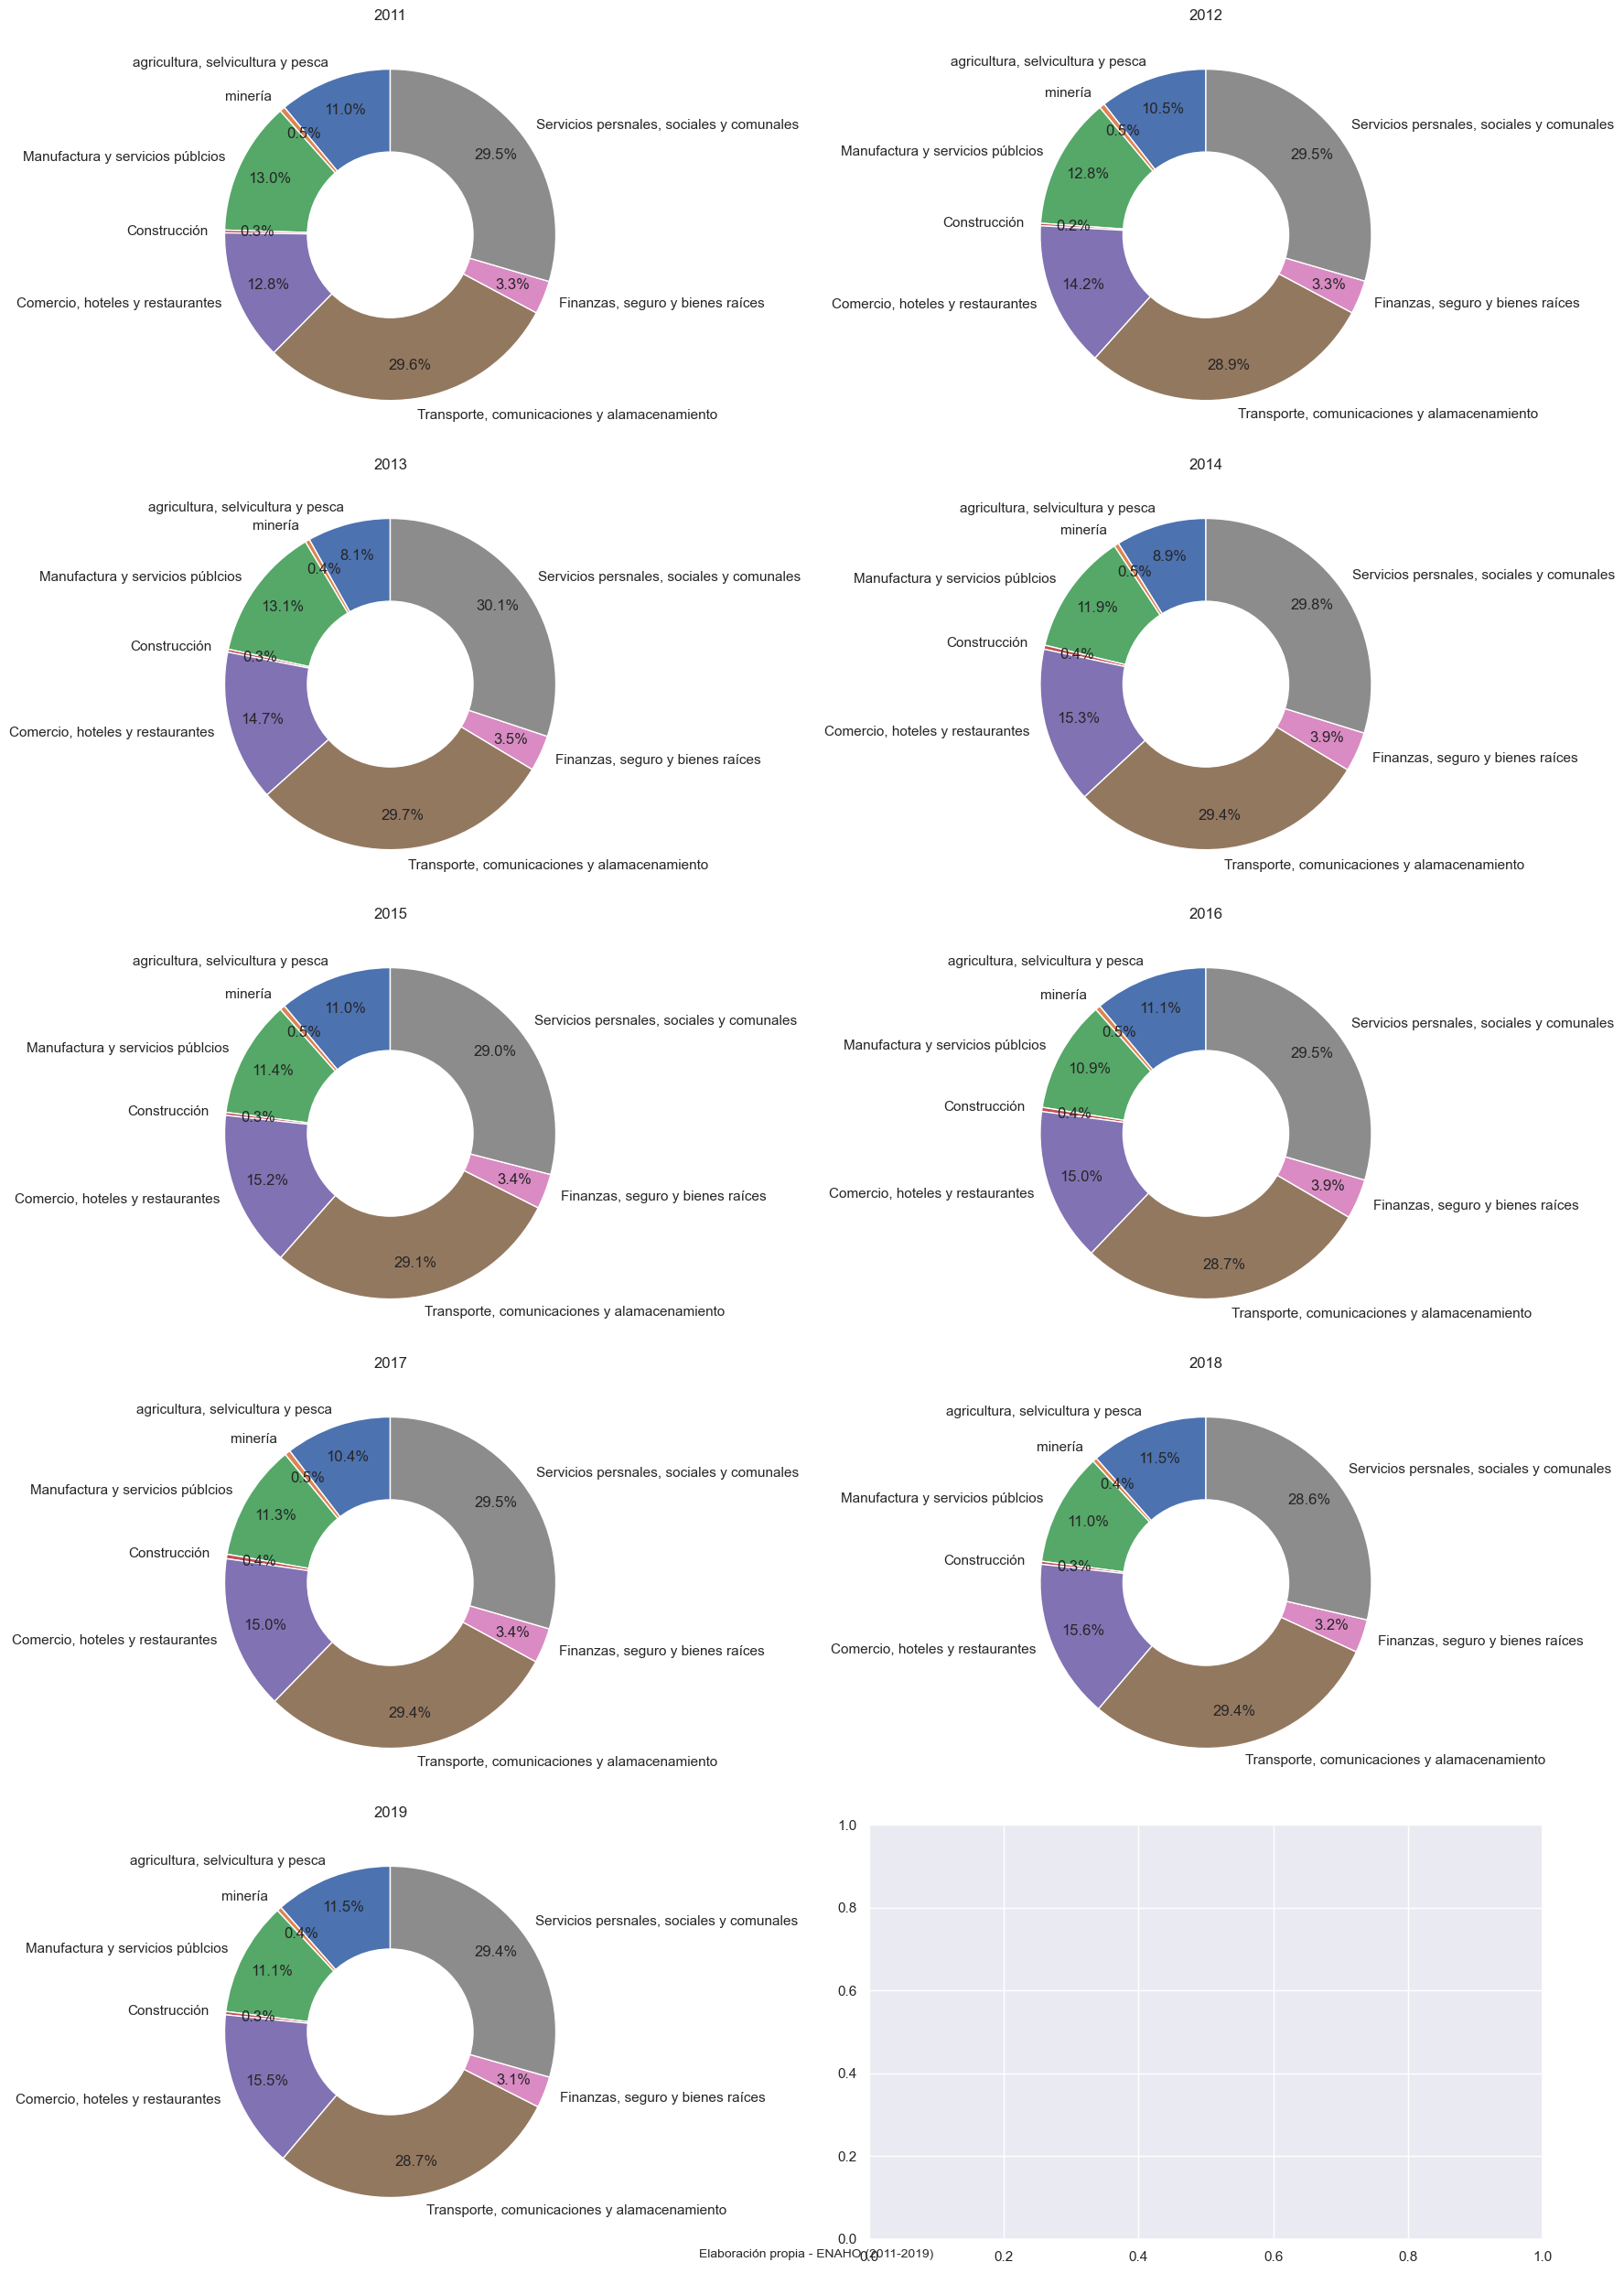

In [193]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por año y sector
base = enaho.groupby(['year', 'sector'], observed=True).size().unstack()

# Obtener los años únicos
years = base.index
num_years = len(years)

# Determina el número de filas y columnas para la cuadrícula
# Puedes ajustar esto según el número de años
ncols = 2 # Número de columnas deseado
nrows = (num_years + ncols - 1) // ncols  # Número de filas necesario

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

for i, year in enumerate(years):
    # Extraer los datos del año actual
    data = base.loc[year]
    
    # Crear el gráfico de pastel
    data.plot(kind='pie', ax=axes[i], autopct="%1.1f%%", pctdistance=0.8, startangle=90)
    axes[i].set_title(f"{year}")
    axes[i].set_ylabel("")  # Eliminar la etiqueta y

    # Agregar el círculo blanco en el centro
    center_circle = plt.Circle((0, 0), 0.50, fc='white')
    axes[i].add_artist(center_circle)

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Agregar texto adicional en la parte inferior del gráfico
fig.text(0.5, 0.01, "Elaboración propia - ENAHO (2011-2019)", ha='center', fontsize=10)

plt.show()


# Distributions

Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.

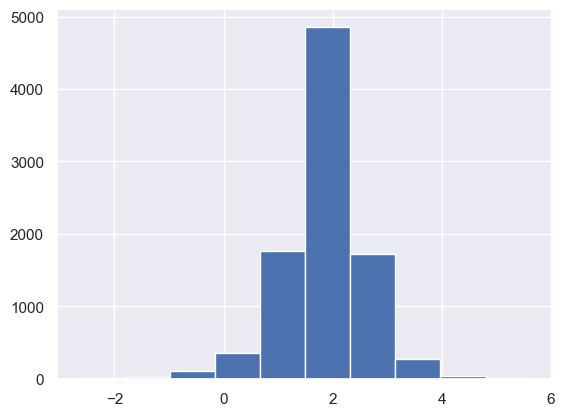

In [213]:
# filter database to 2019
base4 = enaho[enaho['year'] == "2019" ]
base4.l_salario.hist()
plt.show()

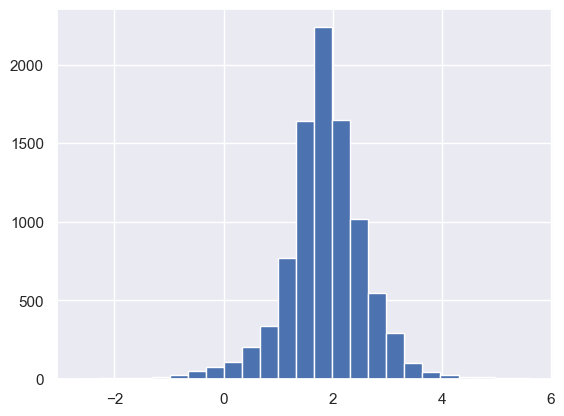

In [221]:
base4.l_salario.hist(bins=25)
plt.show()

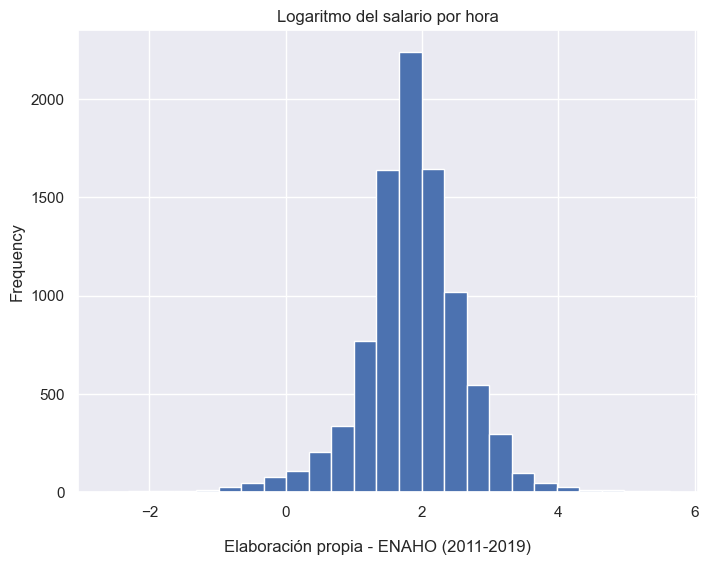

In [222]:
base4['l_salario'].plot(kind = 'hist', bins = 25, figsize = (8,6))
plt.title('Logaritmo del salario por hora')
txt="Elaboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Reducing intervals 

Frequency distribution with a smaller interval (lower relative frequency). Therefore, the height of each bar accounts smaller amount.

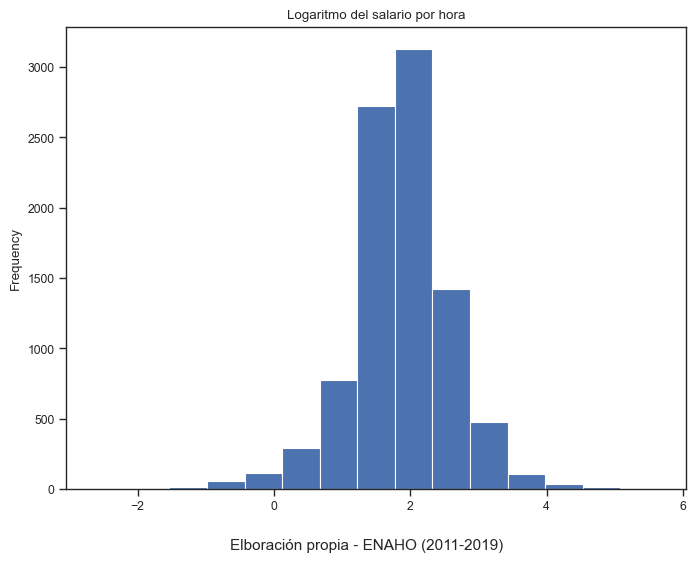

In [229]:
sns.set('paper')
sns.set_style("ticks")
base4['l_salario'].plot(kind = 'hist', bins = 15, figsize = (8,6))
plt.title('Logaritmo del salario por hora')
txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

## Multiple histograms

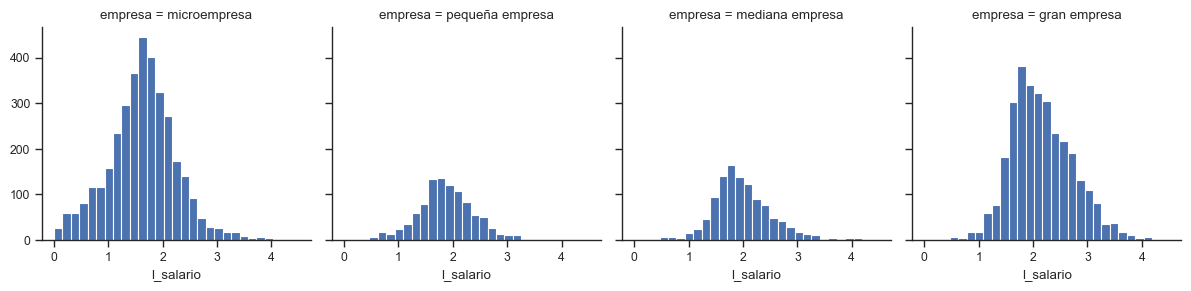

In [250]:
figure1 = sns.FacetGrid(base4, col="empresa", margin_titles=True)
figure1.map(plt.hist, 'l_salario', bins=np.linspace(0, 4.5, 30)) # bins = np.linspace(inicio,final,particiones)

##### Real salary per hour density: 
the distribution does not resemble a standard normal. The information is concentrated in lower values and there are some observations of high values.

C:\Users\jesus\AppData\Local\Temp\ipykernel_17648\1251152249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base4['salario'], label = "Densidad", color = 'blue')


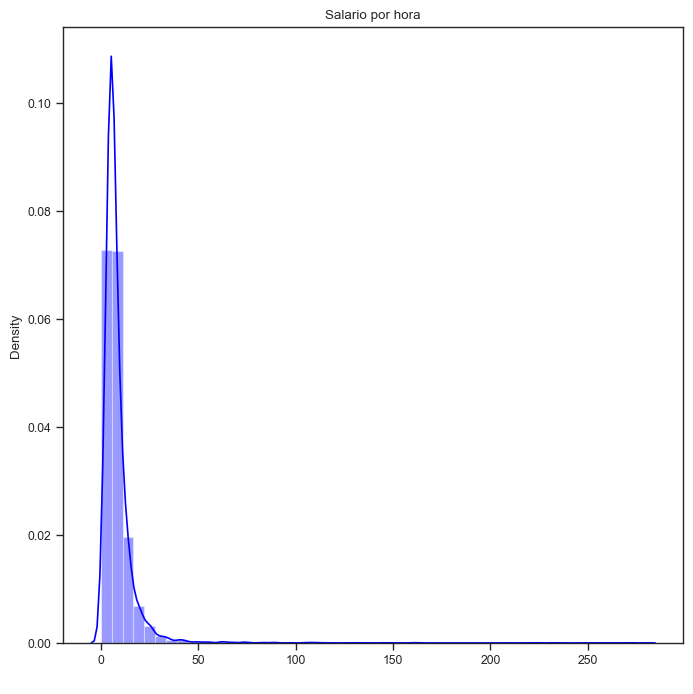

In [251]:
plt.figure(figsize=(8, 8))
sns.distplot(base4['salario'], label = "Densidad", color = 'blue')
plt.title('Salario por hora')
plt.xlabel(' ')
plt.show()

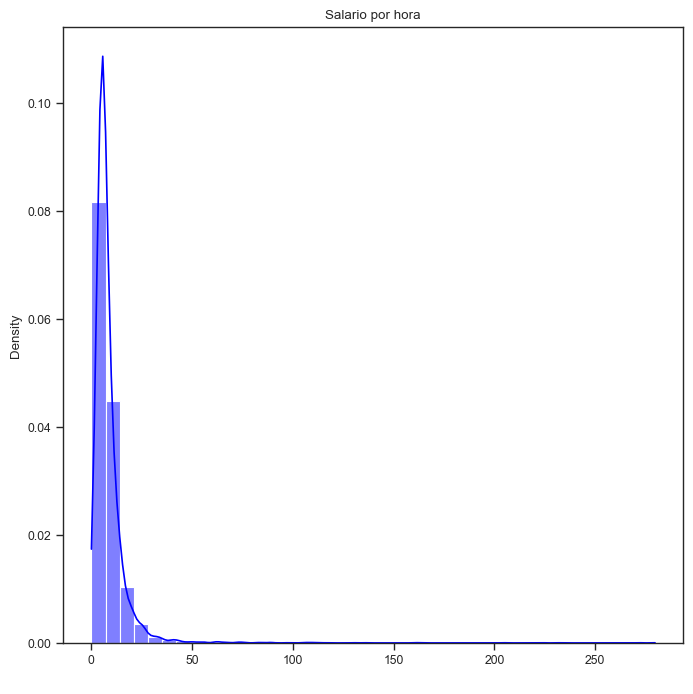

In [261]:
plt.figure(figsize=(8, 8))
sns.histplot(base4['salario'], label="Densidad", color='blue', kde = True, bins = 40, stat = "density") # kde = True estima el kernel
plt.title('Salario por hora')
plt.xlabel(' ')
plt.show()

## Logarithm of real hourly wage

This allows correcting the asymmetry presented by the original data.

C:\Users\jesus\AppData\Local\Temp\ipykernel_17648\386589494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')


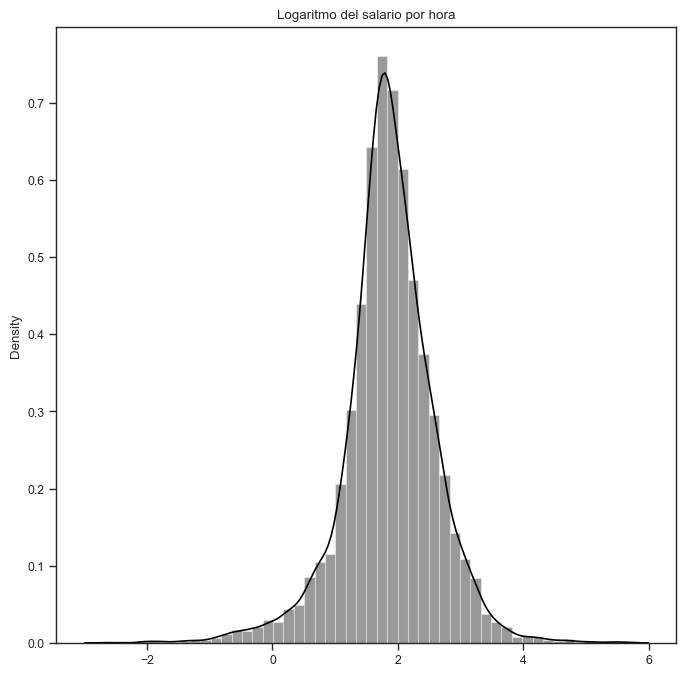

In [258]:
#Alternative figure size
plt.figure(figsize=(8, 8))
sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

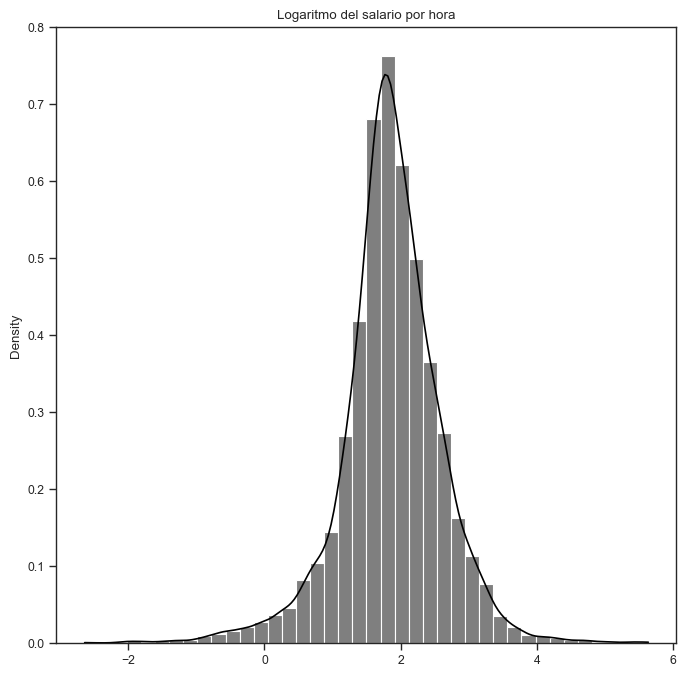

In [262]:
plt.figure(figsize=(8, 8))
sns.histplot(base4['l_salario'], label="Densidad", color='black', kde = True, bins = 40, stat = "density") # kde = True estima el kernel
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

## Real salaries for tres sectors (Construction, Mining and services)


In [105]:
base4.sector

142727    agricultura, selvicultura y pesca
142728                                  NaN
142729                                  NaN
142730    agricultura, selvicultura y pesca
142731                                  NaN
                        ...                
160767                                  NaN
160768     Comercio, hoteles y restaurantes
160769     Comercio, hoteles y restaurantes
160770                                  NaN
160771     Comercio, hoteles y restaurantes
Name: sector, Length: 18045, dtype: category
Categories (8, object): ['agricultura, selvicultura y pesca' < 'minería' < 'Manufactura y servicios públcios' < 'Construcción' < 'Comercio, hoteles y restaurantes' < 'Transporte, comunicaciones y alamacenamiento' < 'Finanzas, seguro y bienes raíces' < 'Servicios persnales, sociales y comunales']

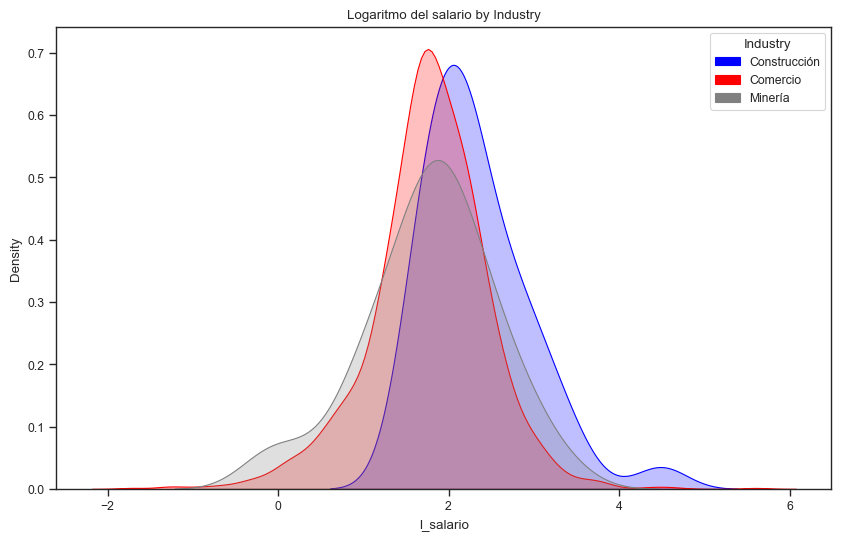

In [270]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

#Adding densities 

sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', fill=True, color="blue")
sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes', fill=True, color = "red")
sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', fill=True, color="gray")
plt.title('Logaritmo del salario by Industry')

# Define custom colors
color1 = 'blue'
color2 = 'red'
color3 = "gray"
# Create legend handles
handle1 = mpatches.Patch(color=color1, label='Construcción')
handle2 = mpatches.Patch(color=color2, label='Comercio')
handle3 = mpatches.Patch(color=color3, label='Minería')
# Manually adding a legend with custom colors
plt.legend(handles=[handle1, handle2, handle3], title='Industry')
# Construction sector shows certain stochastic dominance over mining and services

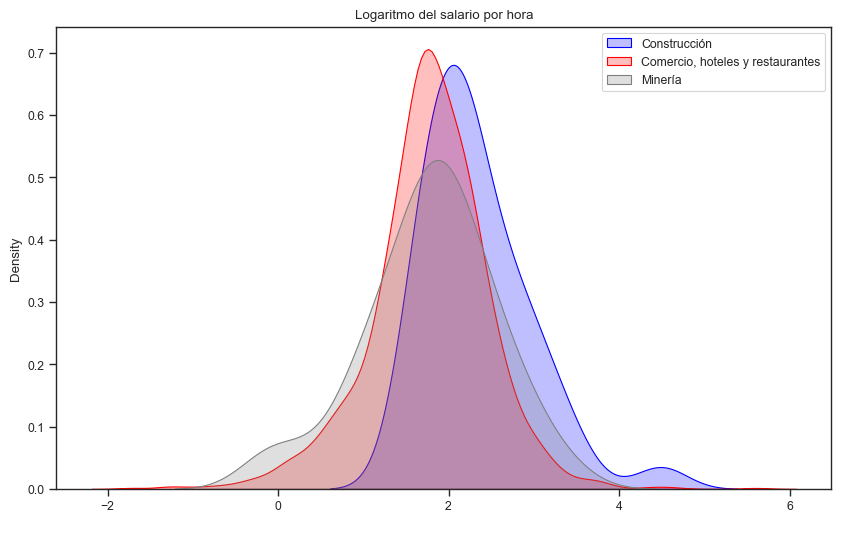

In [271]:
plt.figure(figsize=(10, 6))

# Actualizar el argumento shade a fill
sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', fill=True, color="blue")
sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes', fill=True, color="red")
sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería', fill=True, color="gray")

plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.legend()  
plt.show()

## Labor occupations and real salary per hour densities

A For loop is used to include in the same graph the density function of hourly wages for different occupations.

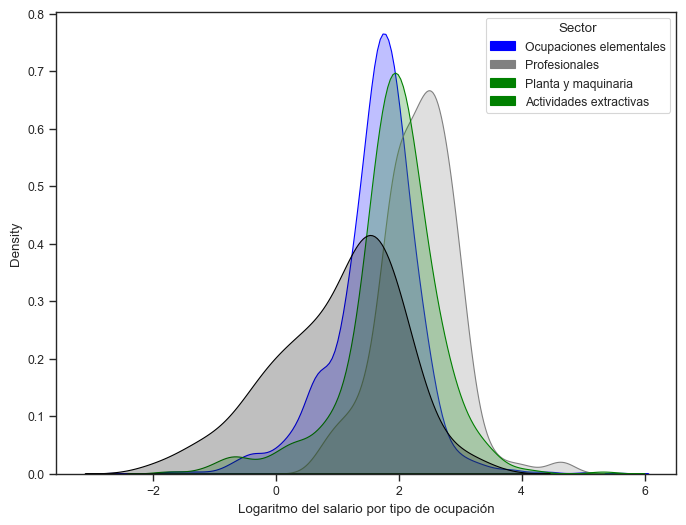

In [279]:
fig, ax = plt.subplots(figsize=(8,6))

sector = [ 'Ocupaciones elementales', 'Profesionales y fuerzas armadas', 'Operadores de planta y maquinaria',
          'Trabajo en actividades agrícolas, selvicultura y pesca']

nombre = [ 'Ocupaciones elementales', 'Profesionales', 'Planta y maquinaria','Actividades extractivas']

color = [ 'blue', 'gray', 'green','black']

    
for a, b, c in zip(sector, nombre, color):
        sns.kdeplot(base4.l_salario[base4.labor==a], label=b, fill=True, color = c)

plt.xlabel('Logaritmo del salario por tipo de ocupación')

# Define custom colors
color1 = 'blue'
color2 = 'gray'
color3 = "green"
color4 = "black"
# Create legend handles
handle1 = mpatches.Patch(color=color1, label=nombre[0])
handle2 = mpatches.Patch(color=color2, label=nombre[1])
handle3 = mpatches.Patch(color=color3, label=nombre[2])
handle4 = mpatches.Patch(color=color3, label=nombre[3])
plt.legend(handles=[handle1, handle2, handle3, handle4], title='Sector')
plt.show()
# Two relevant findings: stochastic dominance of the salary of professionals and 
# concentration in lower levels of salary in the non-active primary sector.

## Box plot real salary and education 



C:\Users\jesus\AppData\Local\Temp\ipykernel_17648\587970173.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  (box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))\


[Text(0, 0, 'Sec. completa'),
 Text(1, 0, 'No uni. incompleta'),
 Text(2, 0, 'No uni. completa'),
 Text(3, 0, 'Uni. incompleta'),
 Text(4, 0, 'Uni. completa'),
 Text(5, 0, 'Posgrado')]

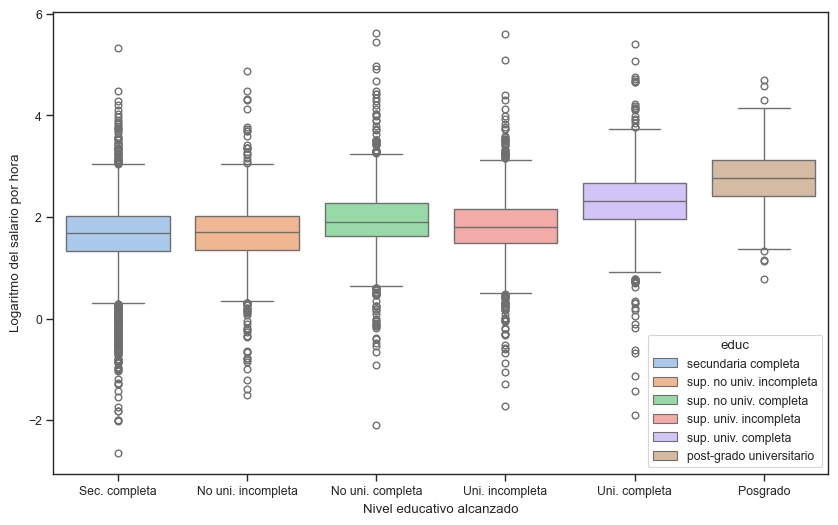

In [281]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="l_salario", hue = "educ", data=enaho[enaho['year'] == "2019" ] ,palette='pastel')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
(box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))\

# The real wage quartiles are increasing with the educational level.
# Lower salary dispersion for the postgraduate level. pastel

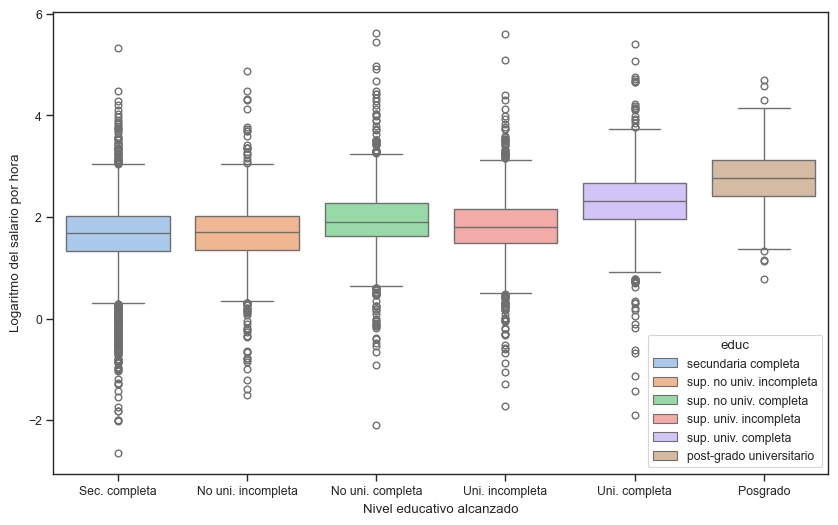

In [283]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="l_salario", hue="educ", data=enaho[enaho['year'] == "2019"], palette='pastel')
    
# Establecer ticks y etiquetas de manera más robusta
tick_labels = ["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]
ax.set_xticks(range(len(tick_labels)))  # Establecer ticks en las posiciones correspondientes
ax.set_xticklabels(tick_labels)  # Establecer las etiquetas para esos ticks

plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')

plt.show()


# Relationships

Charts used for both time series and cross-sectional data. These graphs allow to establish certain evidence of correlation or relationships between variables.

## Scatter plot 

First, a random sample is drawn from the original database. Subsequently, a dispersion graph is presented between the hourly wage (logarithm) and the non-labor monthly income (logarithm).

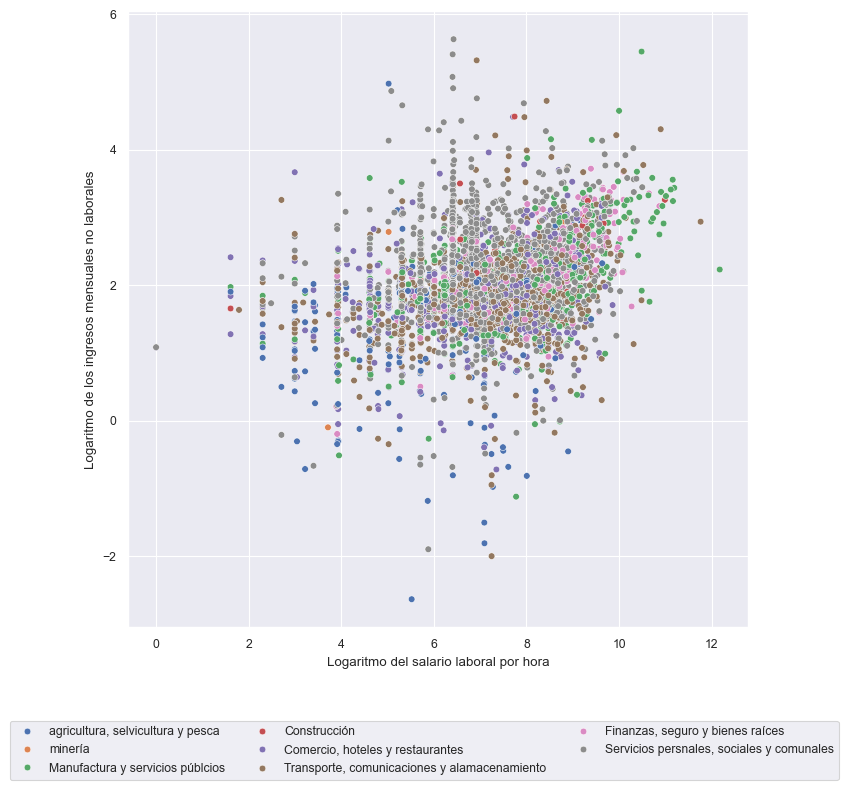

In [285]:
#Full sample

sns.set('paper')
plt.figure(figsize=(8, 8))
plot = sns.scatterplot(data=base4, x="l_n_labor", y="l_salario", hue="sector", palette="deep")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

# By default legend inside plot. Following codes allow us to put outside. 
# bbox_to_anchor: box location
# ncol: # columns of legend

plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)
plt.show()

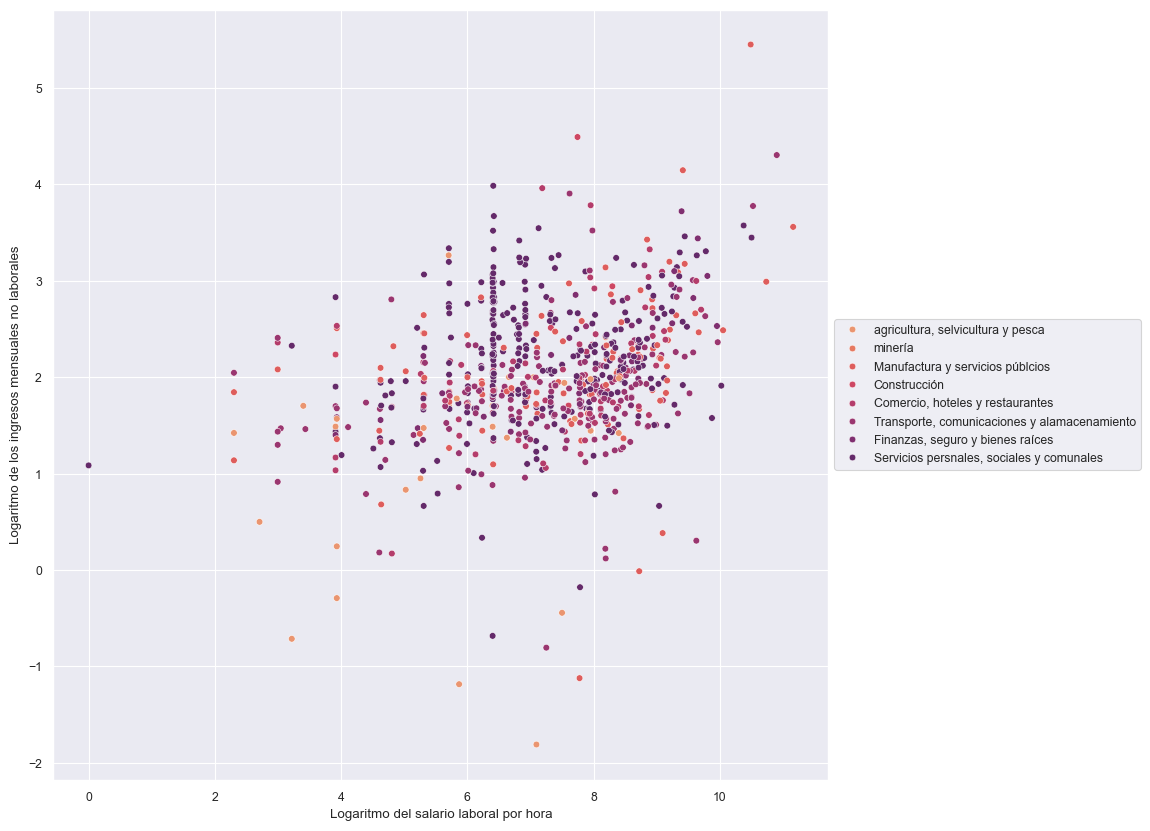

In [287]:
# Ramdon sample n = 3000

base5 = base4.sample(n = 3000)

sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=base5, x="l_n_labor", y="l_salario", hue="sector", palette="flare")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

### Reggresion real salary per hour and  non-labor income by strata

s = The marker size in points**2. <br>
linewidths = "The linewidth of the marker edges."

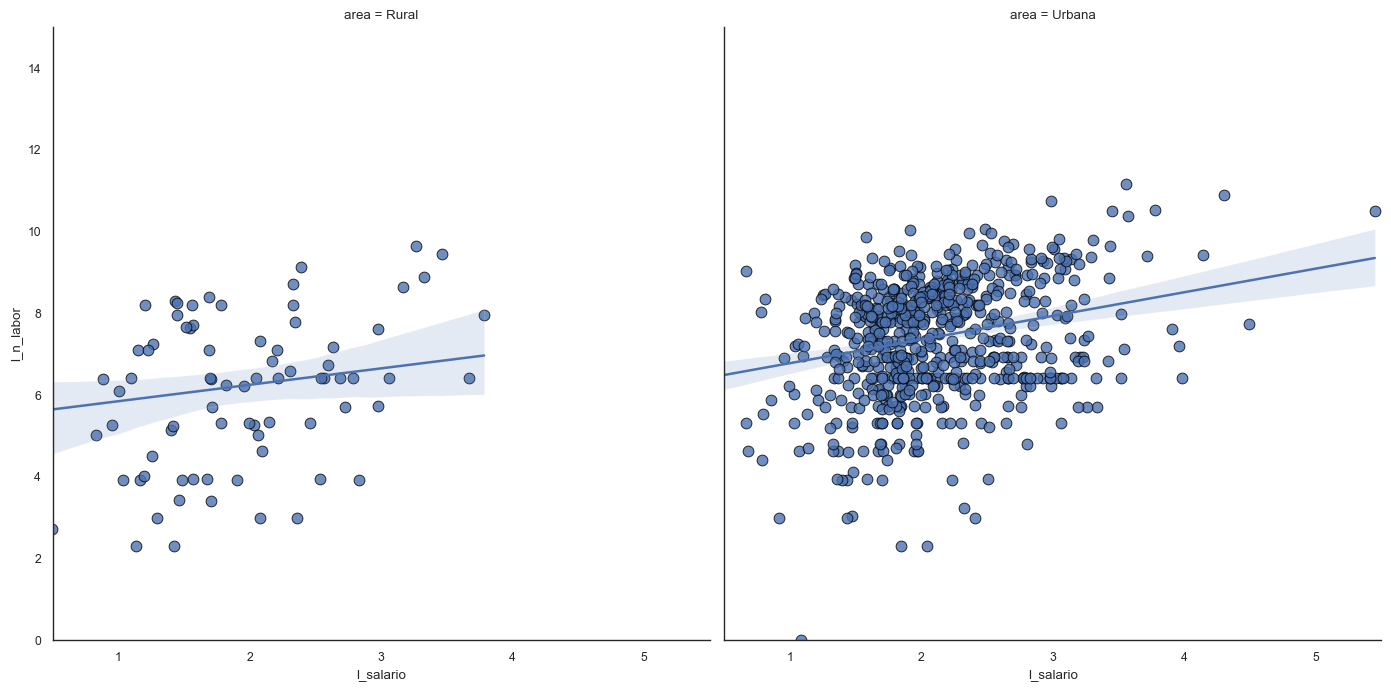

In [293]:
sns.set_style("white")
gridobj = sns.lmplot(x="l_salario", y="l_n_labor", 
                     data=base5, height=7, robust=True, palette='Set1', 
                     col="area",scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 5.5), ylim=(0, 15))
plt.show()

<Axes: xlabel='l_salario', ylabel='l_n_labor'>

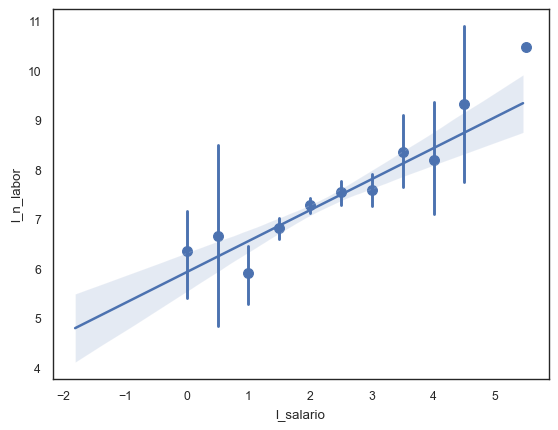

In [297]:
sns.regplot(data=base5, x="l_salario", y="l_n_labor", x_bins=np.arange(0, 10, 0.5), order=1)

# Macroeconomics 
IMP: log-Commodity price index, TC: log-exchange rate, RIN: log-international reserves, IPC: log-price consumption index, RATE: central bank rate reference

D: Annual difference

In [30]:
macro = pd.read_csv(r"../_data/macroeconomia.csv")
macro['YEAR']  = pd.to_datetime(macro['Fecha'])
macro

,Fecha,IPM,TC,RIN,IPC,RATE,DIPM,DTC,DRIN,DIPC,YEAR
0,2003-1,2.83506,1.25634,9.18519,4.41828,3.7500,13.73166,0.83108,12.50532,2.25690,2003-01-01
1,2003-2,2.85371,1.25004,9.21777,4.42295,3.8000,12.48664,0.16400,13.17984,2.76396,2003-02-01
2,2003-3,2.84717,1.24993,9.24303,4.43407,3.8200,7.76170,0.65330,17.18115,3.33857,2003-03-01
3,2003-4,2.80982,1.24554,9.24188,4.43356,3.8400,1.97256,0.69980,13.92729,2.56103,2003-04-01
4,2003-5,2.88617,1.24686,9.23065,4.43324,3.7800,6.81493,0.92160,12.37214,2.39028,2003-05-01
...,...,...,...,...,...,...,...,...,...,...,...
199,2019-8,3.74485,1.22252,11.12236,4.88368,2.5642,3.71183,2.73013,12.37958,2.01920,2019-08-01
200,2019-9,3.74443,1.20844,11.12124,4.88375,2.5038,7.63091,1.29986,15.82517,1.83408,2019-09-01
201,2019-10,3.70510,1.20622,11.13029,4.88486,2.5045,0.48716,0.71850,15.12033,1.86310,2019-10-01
202,2019-11,3.69955,1.20500,11.11988,4.88594,2.2984,0.97267,-0.08858,11.80591,1.84959,2019-11-01


Text(0.5, 0.01, 'Elboración propia - BCRP')

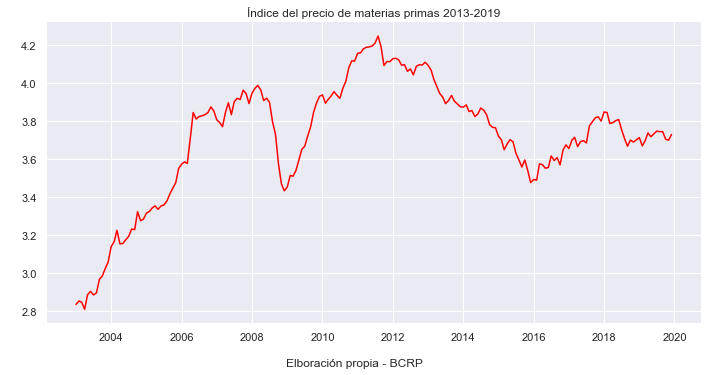

In [32]:
sns.set('notebook')

sns.relplot(x="YEAR", y="IPM", kind="line", color="red", data=macro, height=5, aspect=2)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Índice del precio de materias primas 2013-2019')

txt="Elboración propia - BCRP"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

## Series in a single image

This graph shows a positive relationship between the change in international reserves and the commodity index.

Text(0.2, 0.01, 'Elaboración propia - BCRP')

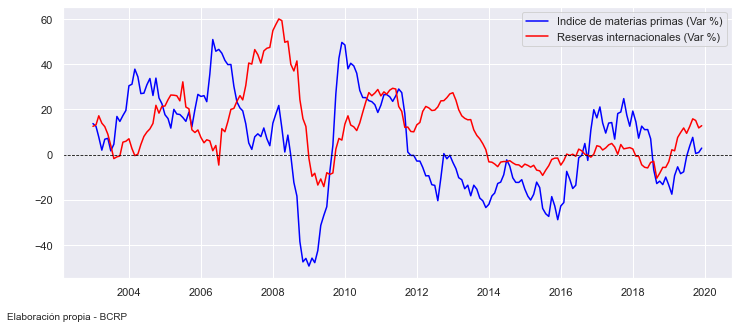

In [88]:
sns.set('notebook')


fig, ax = plt.subplots(figsize=(12,5))

x = macro['YEAR']
y1 = macro['DIPM']
y2 = macro['DRIN']

plt.plot(x, y1, label ='Indice de materias primas (Var %)', color='blue')
plt.plot(x, y2, label ='Reservas internacionales (Var %)', color='red')
plt.axhline(y=0, color='black', linestyle='--', lw=0.8)

plt.legend(loc='upper right')

txt="Elaboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

## Dual-line Plots

### Exchange rate and monetary policy reaction

Text(0.2, 0.01, 'Elboración propia - BCRP')

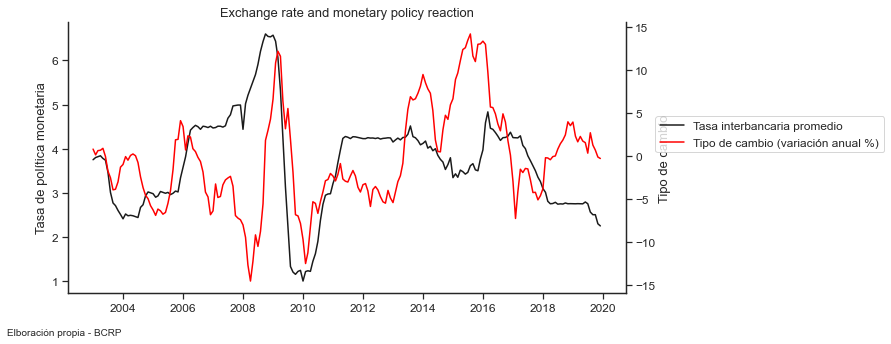

In [89]:
sns.set('notebook', style = "ticks", font_scale= 1.08)

fig, ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(x= "YEAR" , y= "RATE", data=macro, 
                        label = 'Tasa interbancaria promedio ', color="k", legend=False)

#sns.despine()
plt.ylabel('Tasa de política monetaria')
plt.xlabel(' ')
plt.title('Exchange rate and monetary policy reaction');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x= "YEAR", y= "DTC", data=macro, ax=ax2, color = "red", 
                         label ='Tipo de cambio (variación anual %)', legend=False) 
sns.despine(right=False)
plt.ylabel('Tipo de cambio')
ax.figure.legend(loc='lower center', bbox_to_anchor=(1.1, 0.5), ncol=1);


txt="Elboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

#### Reference:

#### Library of plots 

https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

#### Seaborn package:

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://programmerclick.com/article/54791895404/